### Week 16 DataCamp
### Linear Classifiers in Python

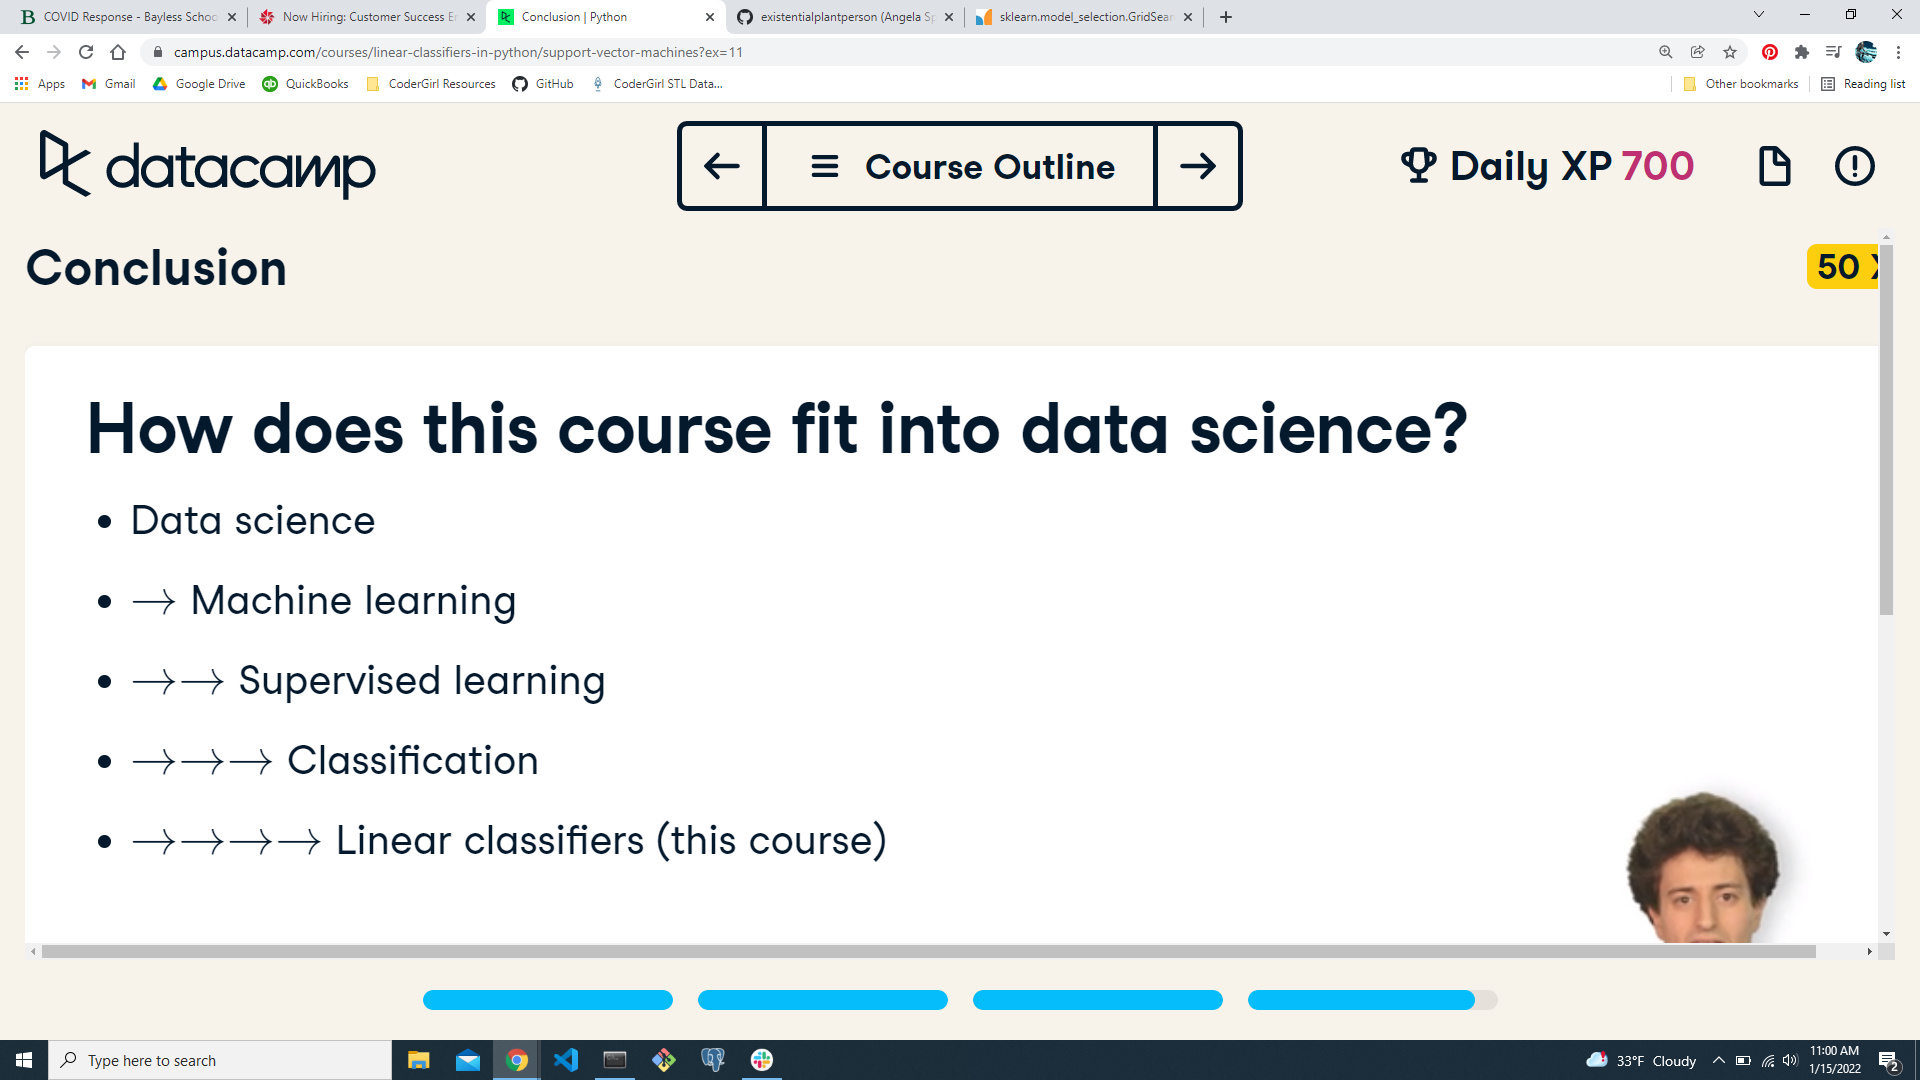

## CHAPTER 1
#### Applying Logistic Regression and SVM

- Import dataset    
        import sklearn.datasets
        newsgroups = sklearn.datasets.fetch_20newsgroups_vectorized()
        X,y = newsgroups.data, newsgroups.target
- Import KNearest NEighbors Classifier
        from sklearn.neighbors import KNeighborsClassifier
        knn = KNeighborsClassifier(n_neighbors = 1)
        
        #fit data
        knn.fit(X,y)
        y_pred = knn.predict(X) # contains prediction from trained classifier
        #evaluate on seen data is not very helpful, need validation set
        knn.score(X,y)
        
        #default is 75-25 split
        from sklearn.model_selection import train_test_split
        X_train, x_test, y_train, y_test = train_test_split(X,y)
        knn.fit(X_train, y_train)
        knn.score(X_test, y_test)
- scikitlearn cheatsheeet: 
https://datacamp-community-prod.s3.amazonaws.com/5433fa18-9f43-44cc-b228-74672efcd116
- Overfitting
    - high training data score and low testing data score can show a model that overfits the data

##### Applying Logistic Regression and SVM
    from sklearn.linear_model import LogisticRegression
    lr=LogisticRegression()
    lr.fit(X_train, y_train)
    lr.predict(X_test)
    lr.score(X_test, y_test)

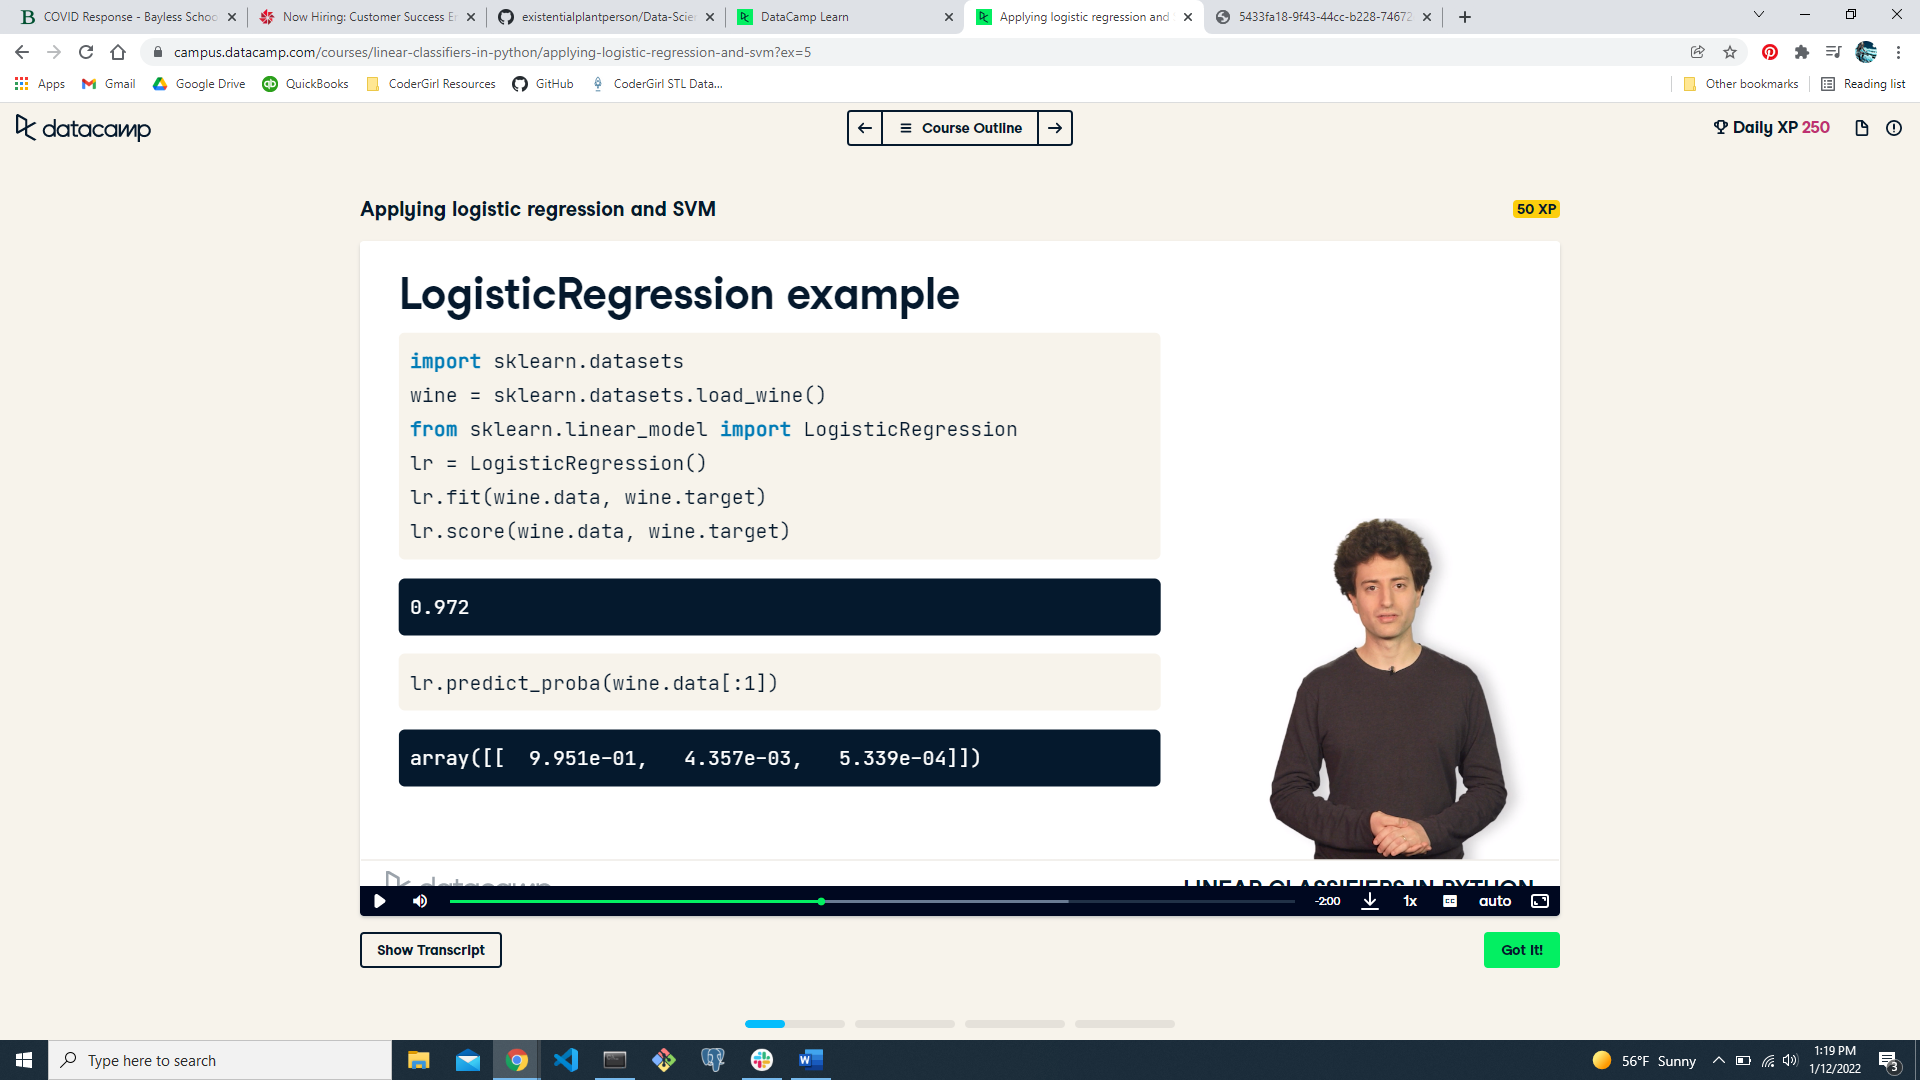

##### Using LinearSVC (Linear Support Vector Classifier)
- works same way as LogisticRegression
        import sklearn.datasets
        wine = sklearn.datasets.load_wine()
        from sklearn.svm import LinearSVC
        svm = SVC()  #default hyperparameters
        svm.fit(wine.data, wine.target)
        svm.score(wine.data, wine.target)
        
        #output = 1 for 100% fit of target to data
- underfitting - model too simple, low training accuracy
- overfitting - model too comples, low test accuracy

In [ ]:
# Apply logistic regression and print scores
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

# Apply SVM and print scores
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

OUTPUT:
0.9955456570155902
0.9622222222222222
1.0
0.48

In [ ]:
# Instantiate logistic regression and train
lr = LogisticRegression()
lr.fit(X, y)

# Predict sentiment for a glowing review
review1 = "LOVED IT! This movie was amazing. Top 10 this year."
review1_features = get_features(review1)
print("Review:", review1)
print("Probability of positive review:", lr.predict_proba(review1_features)[0,1])

# Predict sentiment for a poor review
review2 = "Total junk! I'll never watch a film by that director again, no matter how good the reviews."
review2_features = get_features(review2)
print("Review:", review2)
print("Probability of positive review:", lr.predict_proba(review2_features)[0,1])

##### Linear Decision Boundaries
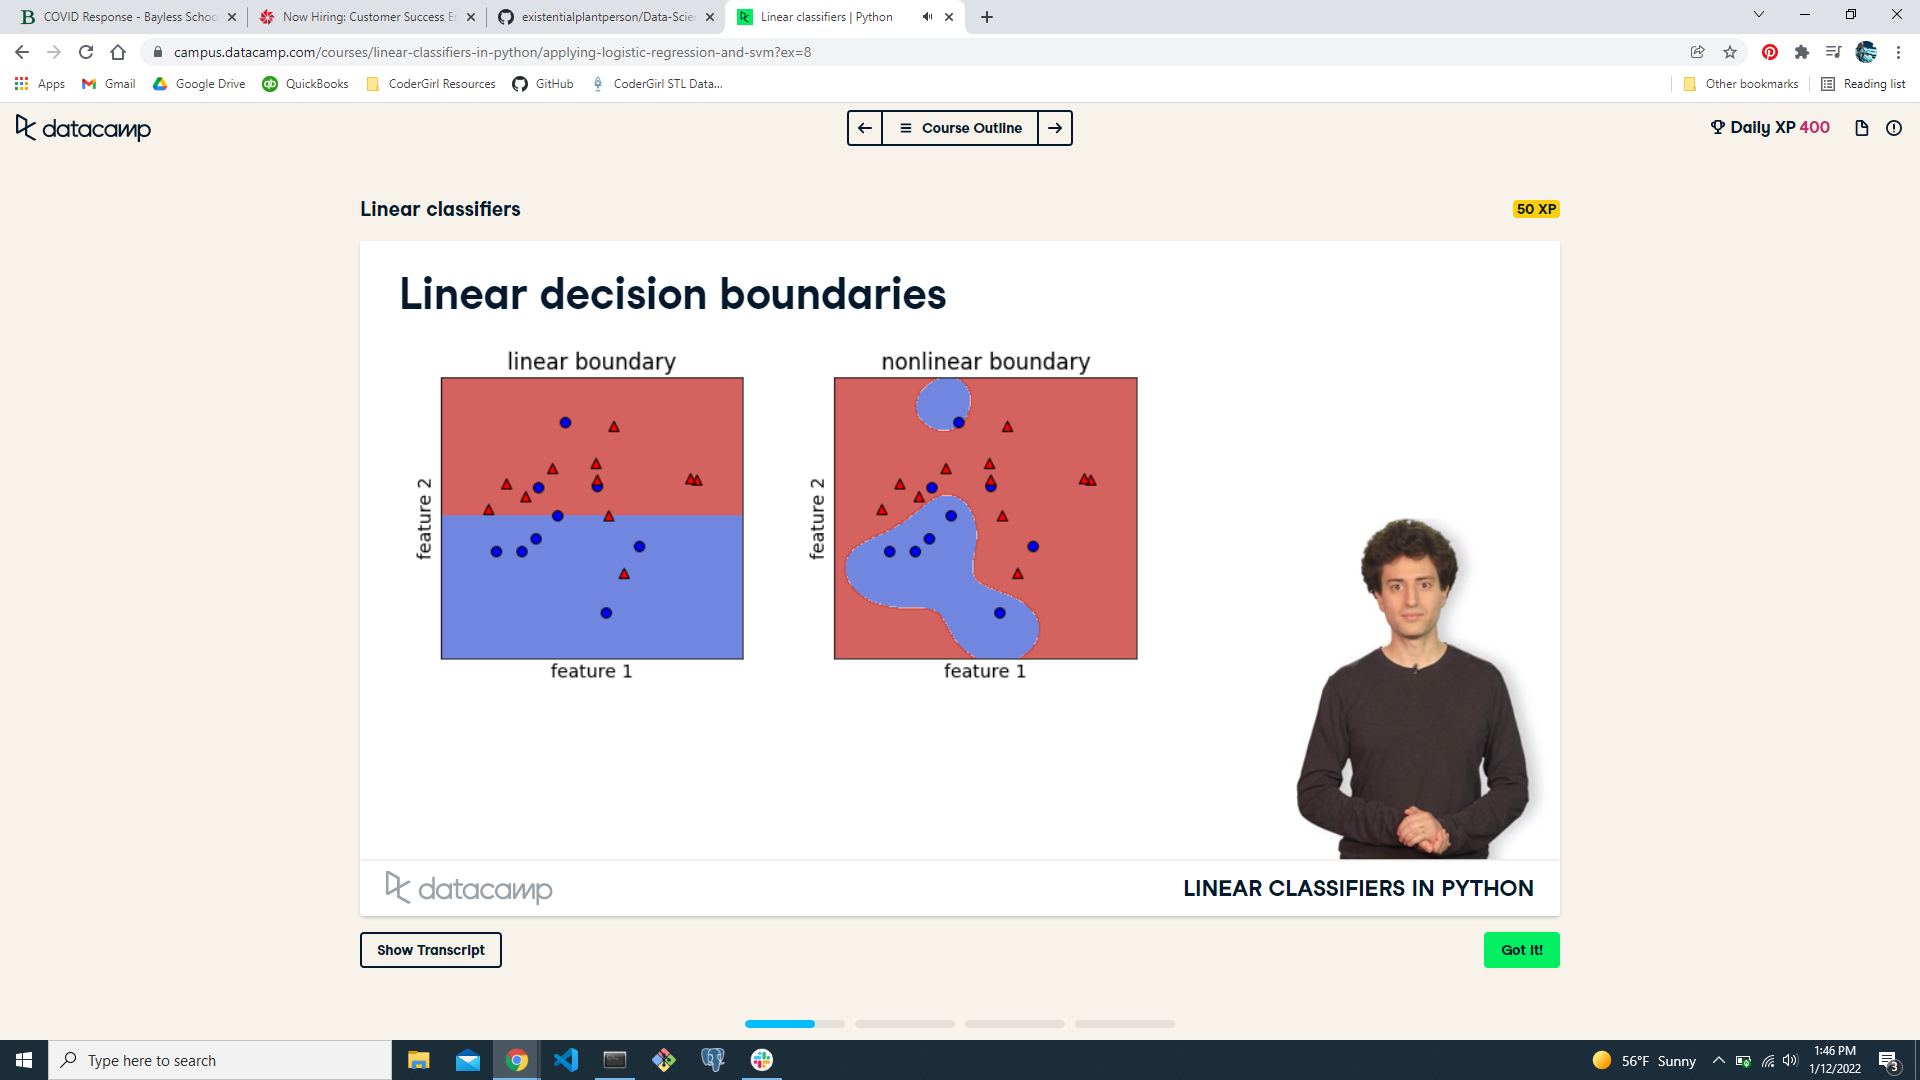
Logistic Regression and SVM are linear classifiers and learn linear decision boundraries

vocabulary
- classification - learning to predict categories
- decision boundary - the surface separating different predicted classes
- linear classifier - a classifier that learns linear decision boundaries 
- linearly separable - a data set can be perfectly explained by a linear classifier
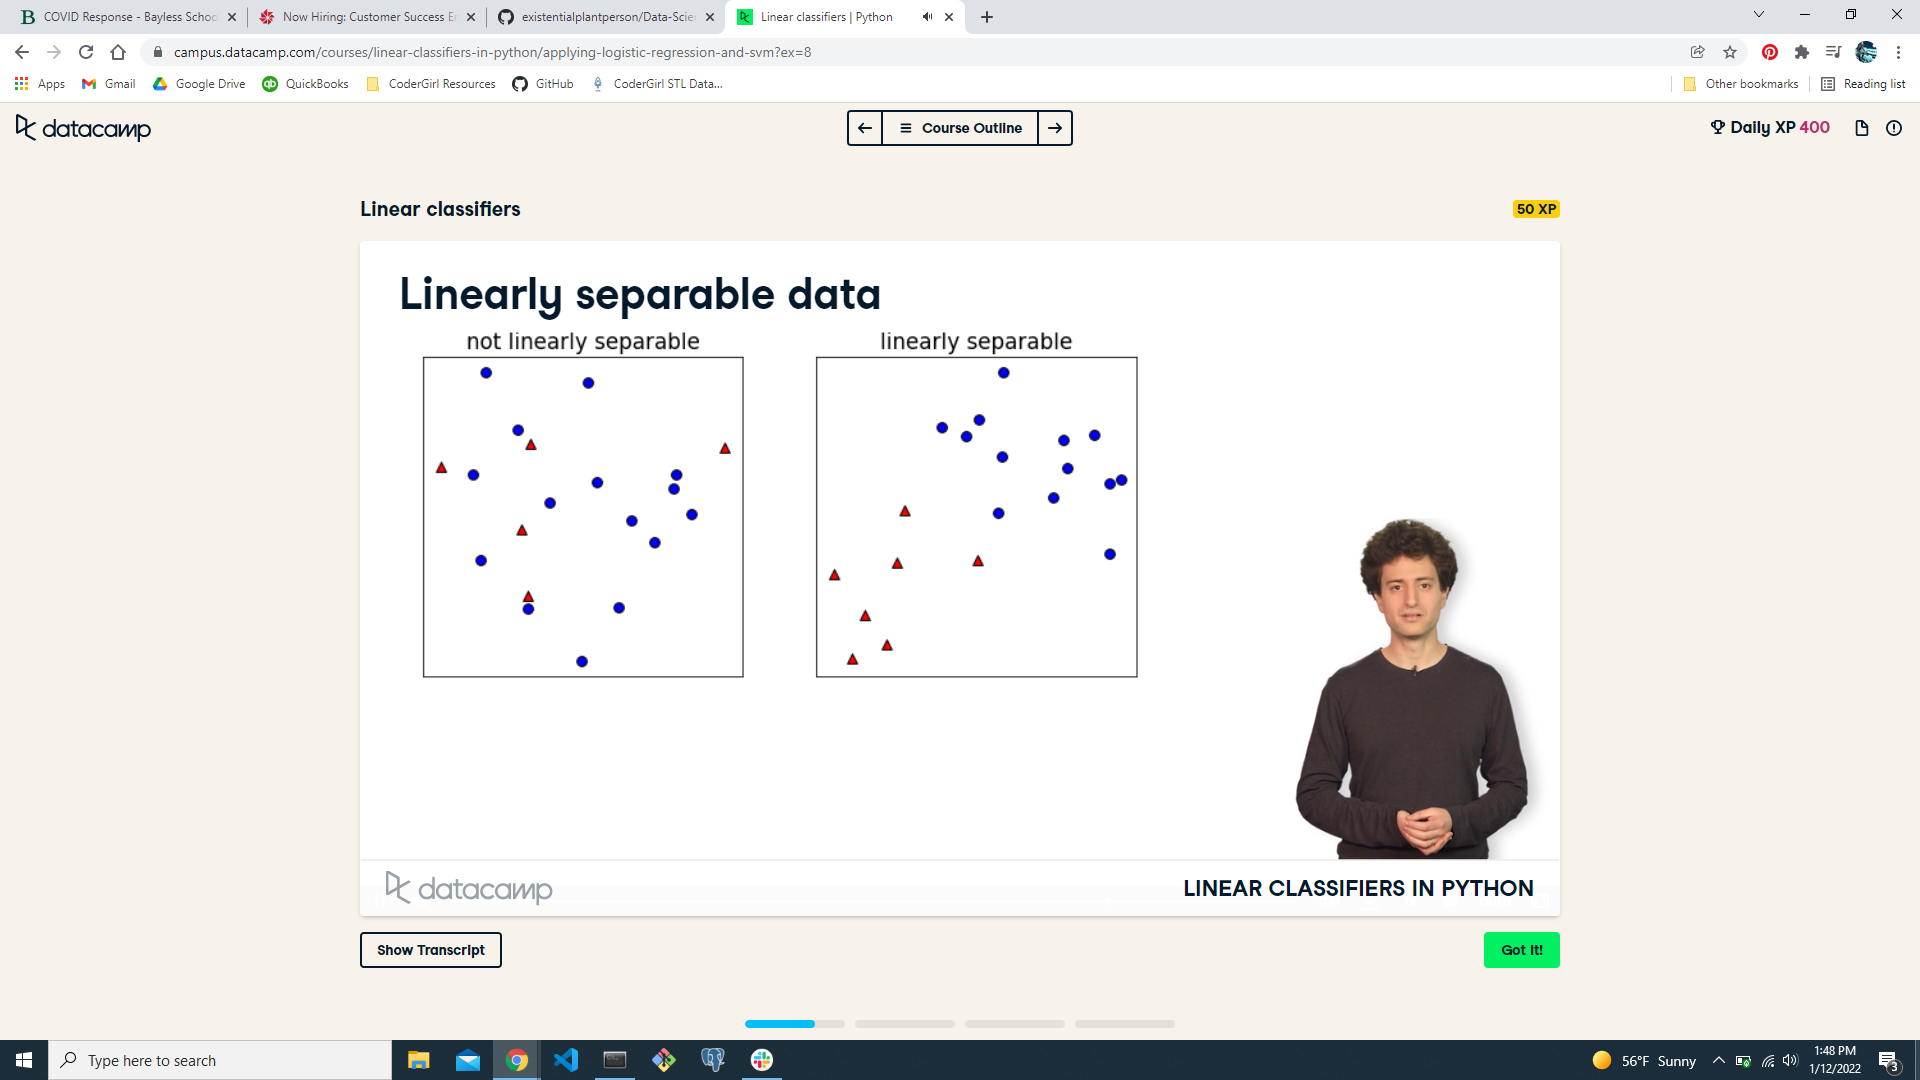

how are logistic reg and SVM different?

In [ ]:
## Visualizing decision boundaries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

# Define the classifiers
classifiers = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

# Fit the classifiers
for c in classifiers:
    c.fit(X,y)

# Plot the classifiers
plot_4_classifiers(X, y, classifiers)
plt.show()

OUTPUT:
    LogisticReg and LinearSVM are linear classifiers
    SVM and KNN are nonlinear classifiers

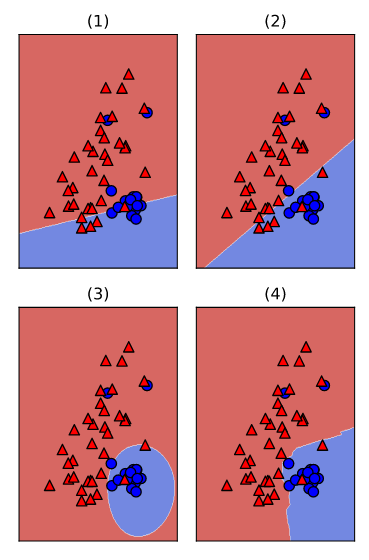

## CHAPTER 2

##### Linear classifiers: the coefficients
    dot products
    X = np.arange(3) = array([0,1,2])
    y = np.arange(3,6) = array([3,4,5])
    x*y = array([0,4,10])
    np.sum(x*y) = 14 

    same as using x@y = 14 for dot product of x and y
    
- linear classifier prediction (same for LogReg, and LinSVM)
    - raw model output = coefficients (dot) features + intercept
    linear classifier prediction: compute raw model output, check the sign
        - if +, predict one class
        - if -, predict the other class
    same for LogReg and LinSVM
        - .fit() is different, but .predict() is the same

- how LogReg makes predictions
    - raw model output = coefficients (dot) features + intercept
            lr = LogisticRegression()
            lr.fit(X,y)
            lr.predict(X)[10]
            OUTPUT: 0
            lr.predict(X)[20]
            OUTPUT: 1
            
            lr.coef_ @ X[10] + lr.intercept_   #raw model output
            OUTPUT: array([-33.79])
            lr.coef_ @ X[20] + lr.intercept_
            OUTPUT: array([0.08])
    - sign tells you which side of the decision boundary the point is on
    - the value gets smaller as you approach the boundary

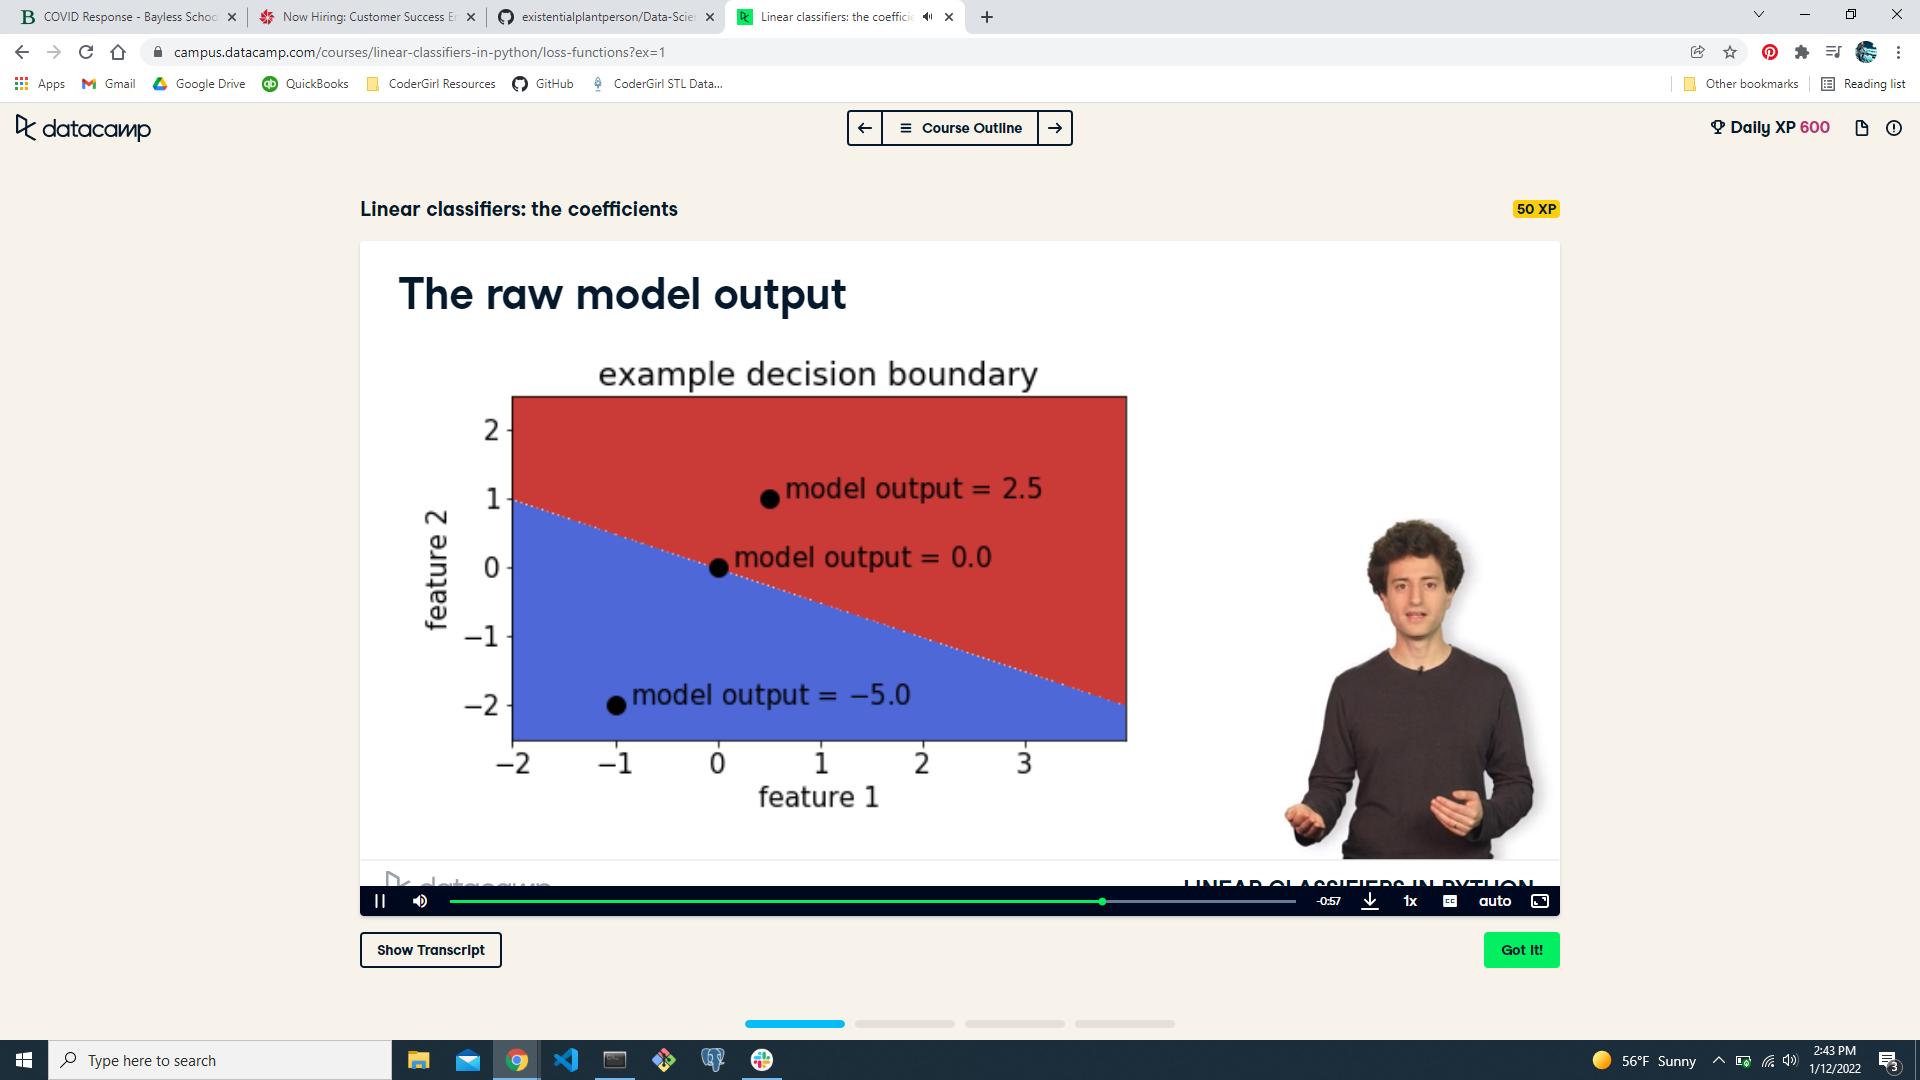

In [ ]:
## experiment with coefficients (slope) and intercept to see change in 
# Set the coefficients
model.coef_ = np.array([[-1,2]])
model.intercept_ = np.array([-5])

# Plot the data and decision boundary
plot_classifier(X,y,model)

# Print the number of errors
num_err = np.sum(y != model.predict(X))
print("Number of errors:", num_err)

##### What is a loss function?
Least squares linear regression minimizes sum of squares of errors (minimizes loss)

classification errors - can't use loss sunction on categories
- a natural loss for classification is th number of errors
- 0-1 loss: 0 for correct and 1 for incorrect
- this loss can be hard to minimize in practice

minimizing a loss
    from scipy.optimize import minmize
    minimize(np.square, 0).X
    OUTPUT: array([0.]))
    Correct because something squared must be positive so the smallest values possible is 0 - our guess was correct
    
    minimize(np.square, 2).X
    OUTPUT: array([-1.89e-08])

- minimize the squared errors from linear regression, inputs are model coefficients
- answer question: what values of model coefficients make the squared error as small as possible


In [ ]:
## implement linear regression "from scratch" using scipy.optimize.minimize

# The squared error, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LinearRegression coefficients
lr = LinearRegression(fit_intercept=False).fit(X,y)
print(lr.coef_)

#### Loss function diagrams

O-1 LOSS DIAGRAM
- set up a plot with loss on vertical axis, predict incorrest on left and correct on right; different from decision boundary diagram (not a measure of features)
- 0-1 loss is drawn on picture, incorrect get penalty of 1 and correct get no penalty; this image shows a single training example
    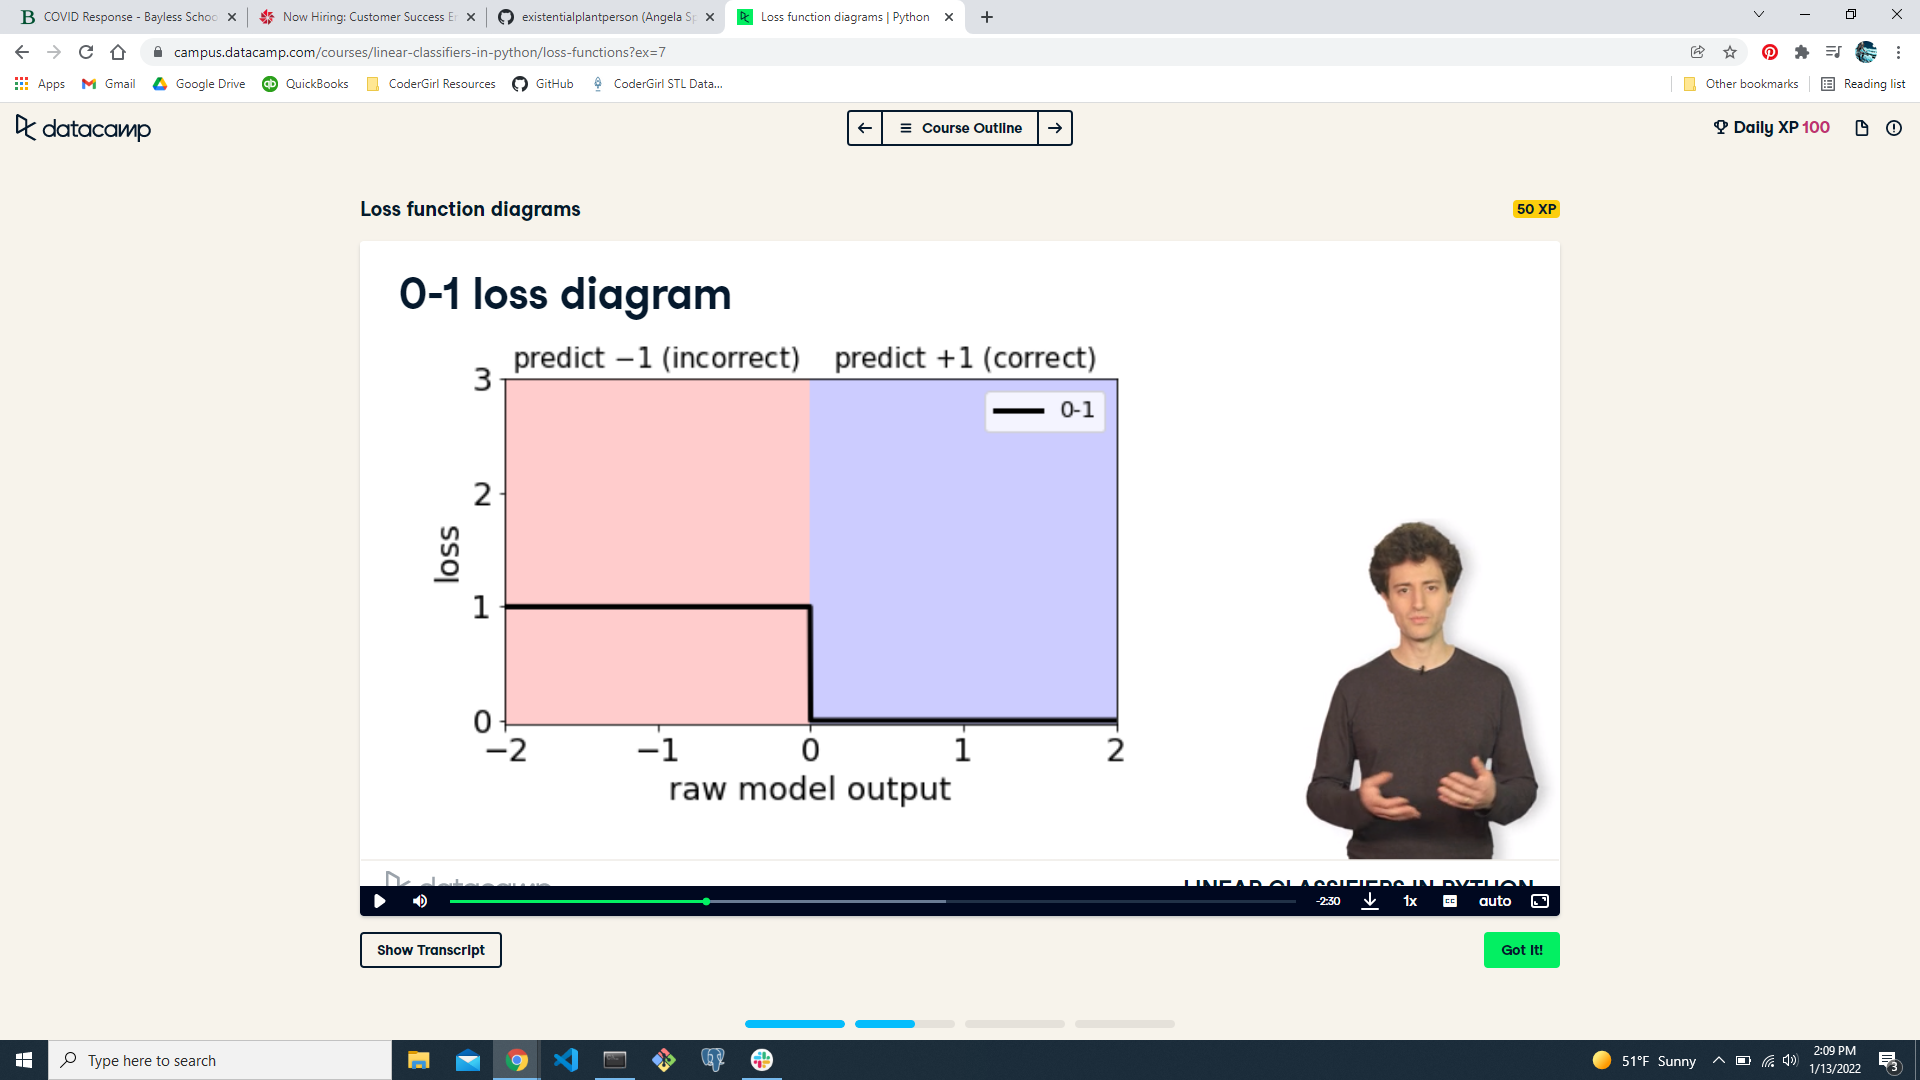

LINEAR REGRESSION LOSS DIAGRAM
- this diagram shows the loss from least squares linear regression, produces a quadratic function; in LinReg the raw model output is the prediction
- the loss is higher as the prediction is further away from the true prediction (in this example the number 1)
- makes sense for regression, but not for classification so least squares doesn't work for LogReg
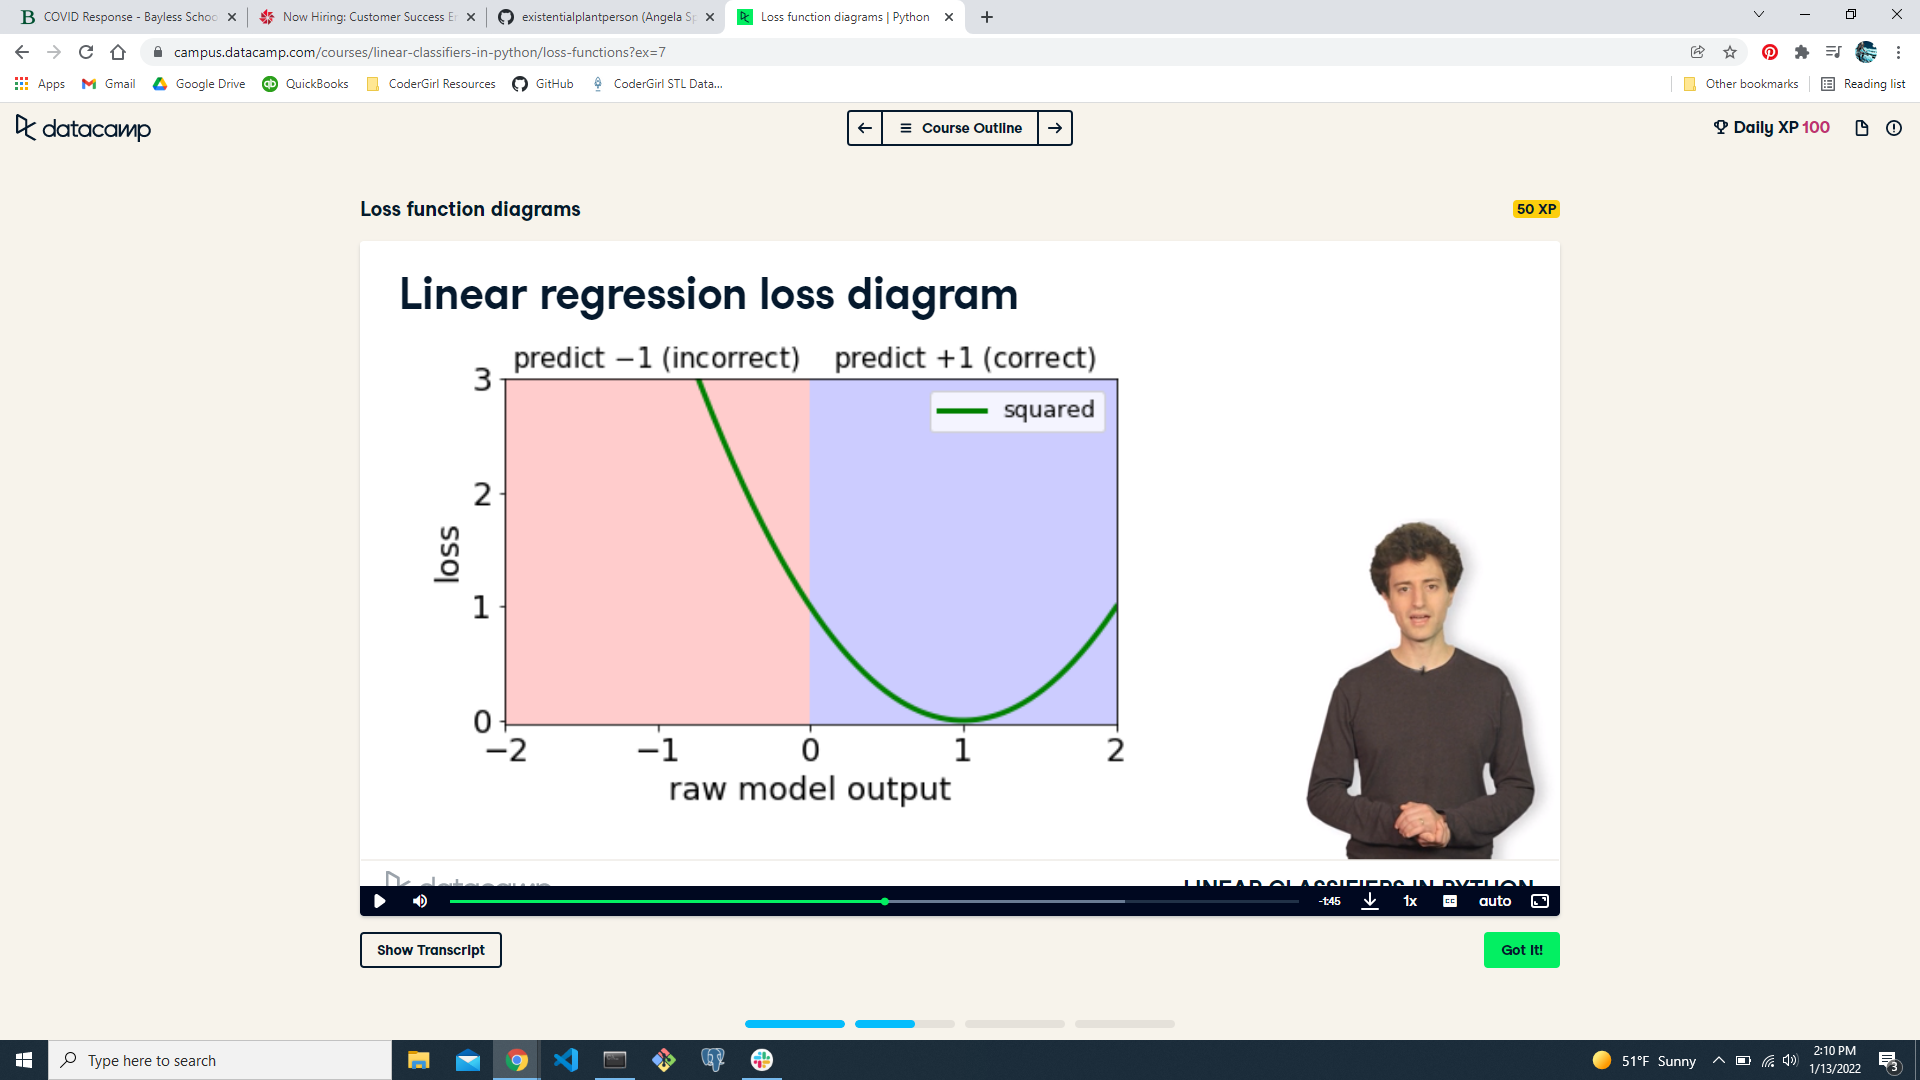

LOGISTIC LOSS DIAGRAM
- logistic loss (orange) used in LogReg loss decreases as you move to the right, towards the zone of correct prediction
- HINGE LOSS DIAGRAM (blue) used in SVM, incorrect predictions penalized in both
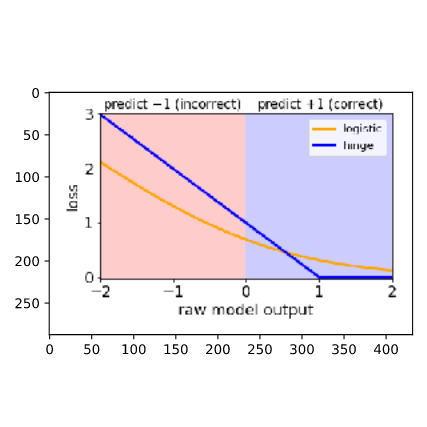

In [ ]:
## create a plot of the logistic and hinge losses using their 
## mathematical expressions, which are provided to you

# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

In [ ]:
## minimize the logistic loss and compare with 
## scikit-learn's LogisticRegression

# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(len(X)):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

## CHAPTER 3

#### Logistic Regression and Regularization

- Regularization combats overfitting by making the model coefficients smaller
- C is the inverse of the regularization strength; smaller C means more regularization, larger C means less regularization
- regularization makes coefficients smaller 
- regularized loss = original loss +large coefficient penalty
- more regularization means lower training accuracy (because the large coefficient penalty distracts)

        lr_weak_reg = LogisticRegression(C=100)
        lr_strong_reg = LogisticRegression(C=0.01)
        weak and strong .fit(X_train, y_train)
        weak and strong .score(X_train, y_train)
        RESULTS: 1.0 = weak and 0.92 = strong
        
- regularization improves test accuracy
        weak and strong .score(X_test, y_test)
        RESULTS: 0.86 = weak and 0.88 = strong
        
L1 vs L2 Regularization
- both help reduce overfitting and L1 also helps perform feature selection
- LASSO = linear regression with L1 Regularization
- RIDGE = linear regression with L2 Regularization

- Example: breast cancer dataset after scaling features
        lr_L1 = LogisticRegression(penalty='L1')
        lr_L2 = LogisticRegression() #penalty L2 by default
        
        both models.fit(X_train, y_train) 
        #plot coefficients for both models with:
        plt.plot(lr_L1.coef_.flatten())

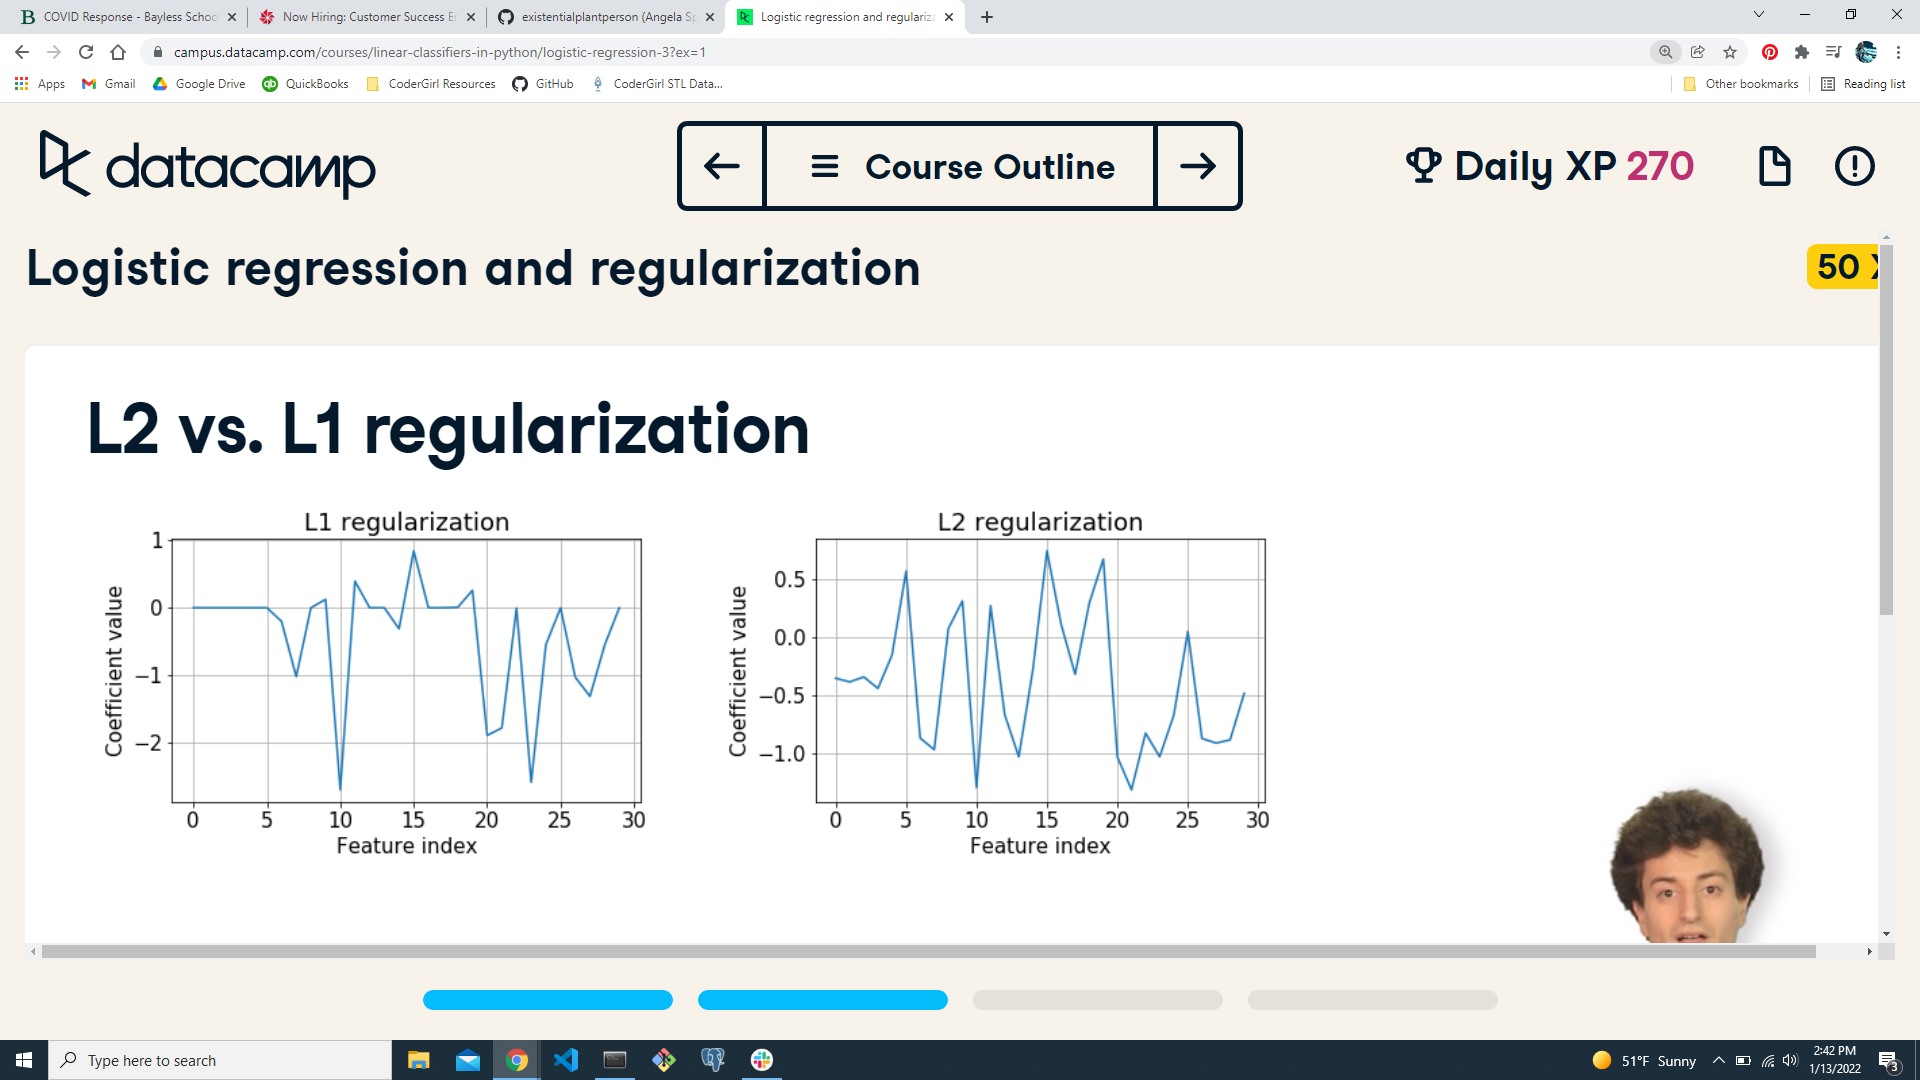
- L1 set many coefficients to zero (performing feature selection)
- L2 shrinks coefficients to be smaller (analagous to Lasso and Ridge regression)

In [ ]:
## Loop over the different values of C_value, creating and fitting a LogisticRegression model
## Save the error on the training set and the validation set for each model.
## Create a plot of the training and testing error as a function of the regularization parameter, C.
## Looking at the plot, what's the best value of C?

# Train and validaton errors initialized as empty list
train_errs = list()
valid_errs = list()

# Loop over values of C_value
for C_value in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    # Create LogisticRegression object and fit
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errs.append( 1.0 - lr.score(X_train, y_train) )
    valid_errs.append( 1.0 - lr.score(X_valid, y_valid) )
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(("train", "validation"))
plt.show()

OUTPUT:
small C = too much regularization = underfitting
large c = too little regularization = overfitting

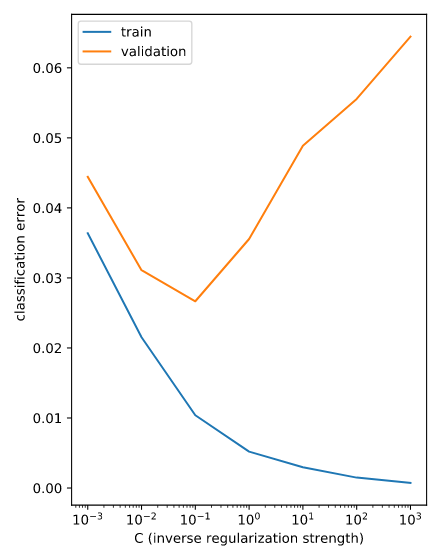

In [ ]:
## Logistic Regression and Feature Selection

# Specify L1 regularization
lr = LogisticRegression(penalty='l1')

# Instantiate the GridSearchCV object and run the search
searcher = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

# Find the number of nonzero coefficients (selected features)
best_lr = searcher.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

In [ ]:
## interpret the coefficients of a logistic regression fit 
## on the movie review sentiment dataset. 

## inds_descending[0] contains the index of the largest coefficient.
## vocab[inds_descending[0]] contains the word corresponding to the largest coefficient.
## inds_ascending gives the words starting with the most negative, 
## while inds_descending gives the opposite.

# Get the indices of the sorted cofficients
inds_ascending = np.argsort(lr.coef_.flatten()) 
inds_descending = inds_ascending[::-1]

# Print the most positive words
print("Most positive words: ", end="")
for i in range(5):
    print(vocab[inds_descending[i]], end=", ")
print("\n")

# Print most negative words
print("Most negative words: ", end="")
for i in range(5):
    print(vocab[inds_ascending[i]], end=", ")
print("\n")

##### Logistic Regression and Probabilities
- confidence increases as you move away from decision boundary
- without regularization small probabilities are very close to decision boundary
- with regularization, smaller confidence window is larger
- ratio of model coefficients gives us the slope
- magnitude of coefficients give confidence level
- regularization affects the orientation of the boundary as well
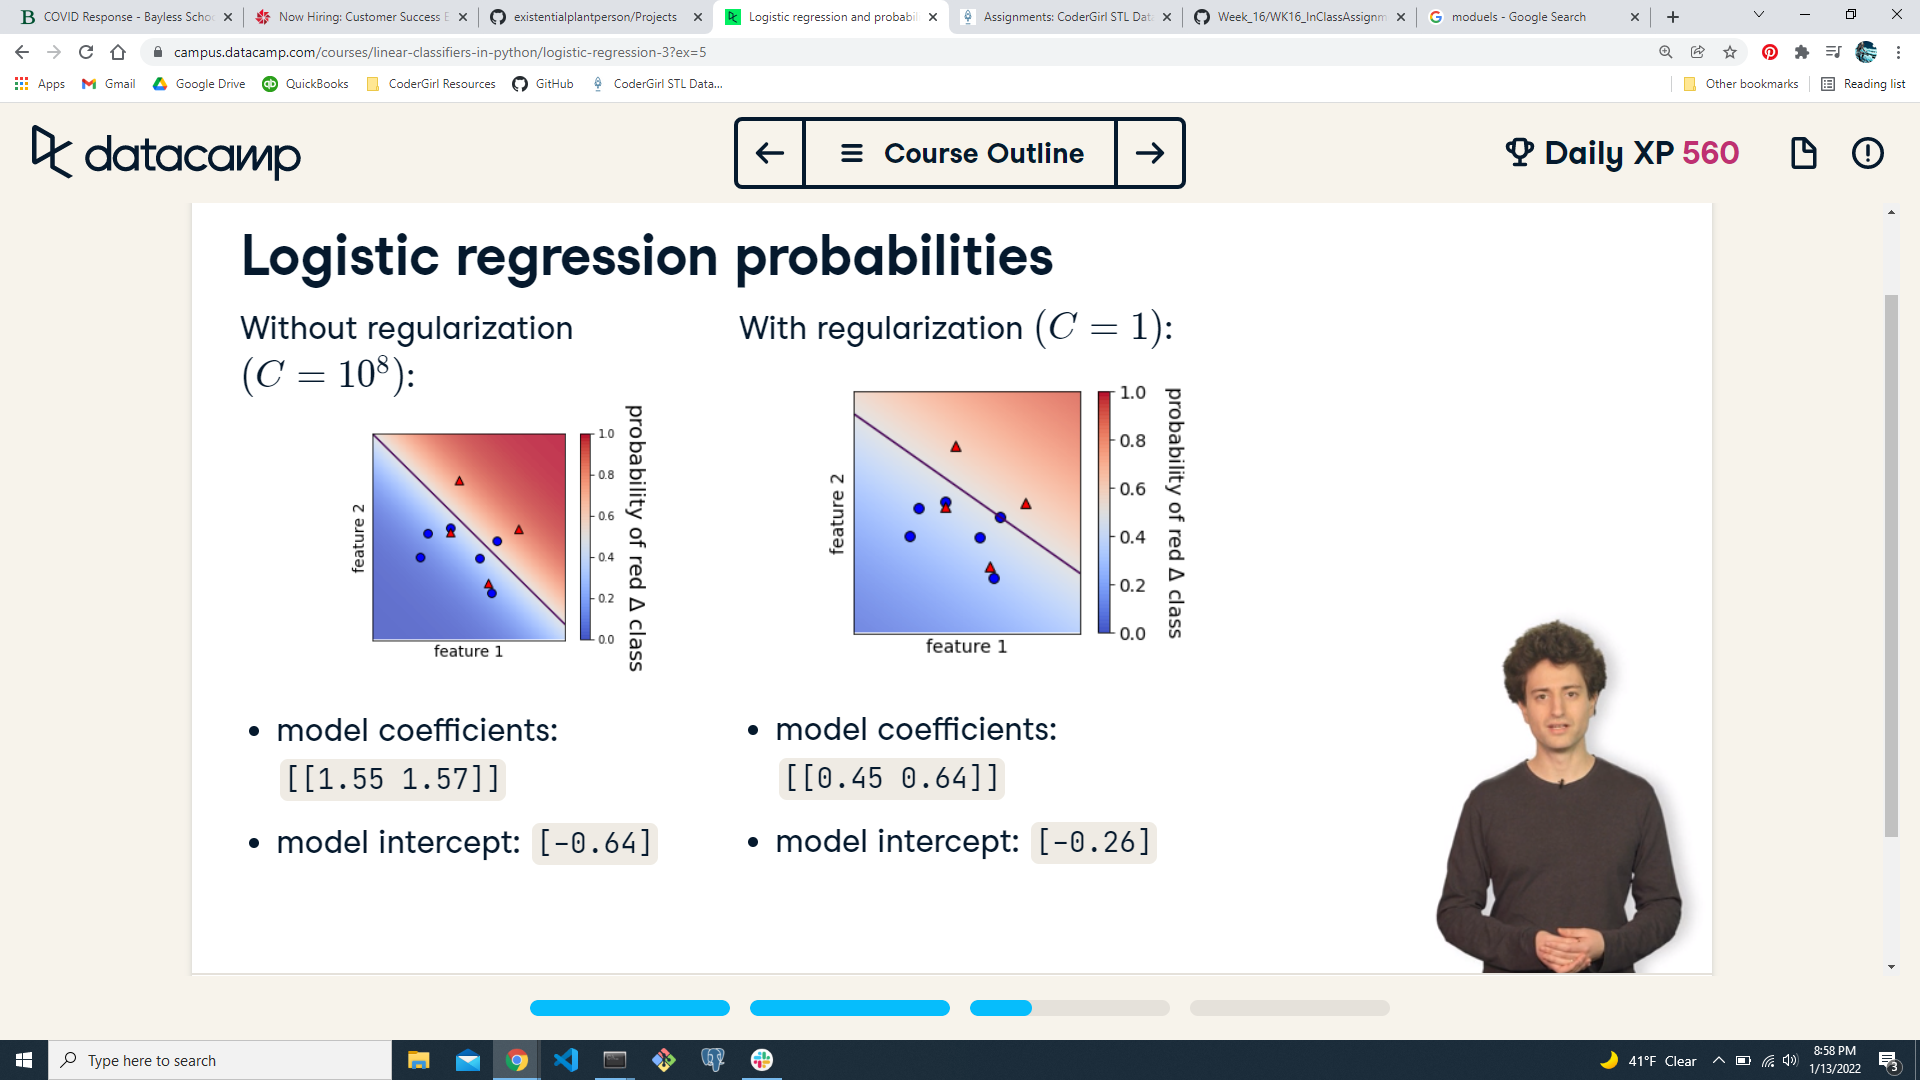

how are probabilities computed?
- LogReg predictions: sign of the raw model output
- LogReg probabilities: "squashed" raw model output (sigmoid curve)
    - when raw model output is 0, probability of + is 50% (decision boundary)
    - as output increases, probability of + approaches 100%
    - as output decreases, probability of + approaches 0%

In [ ]:
## Regularization and Probabilities
## observe the effects of changing the 
## regularization strength on the predicted probabilities

# Set the regularization strength
model = LogisticRegression(C=1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

OUTPUT:
0.976

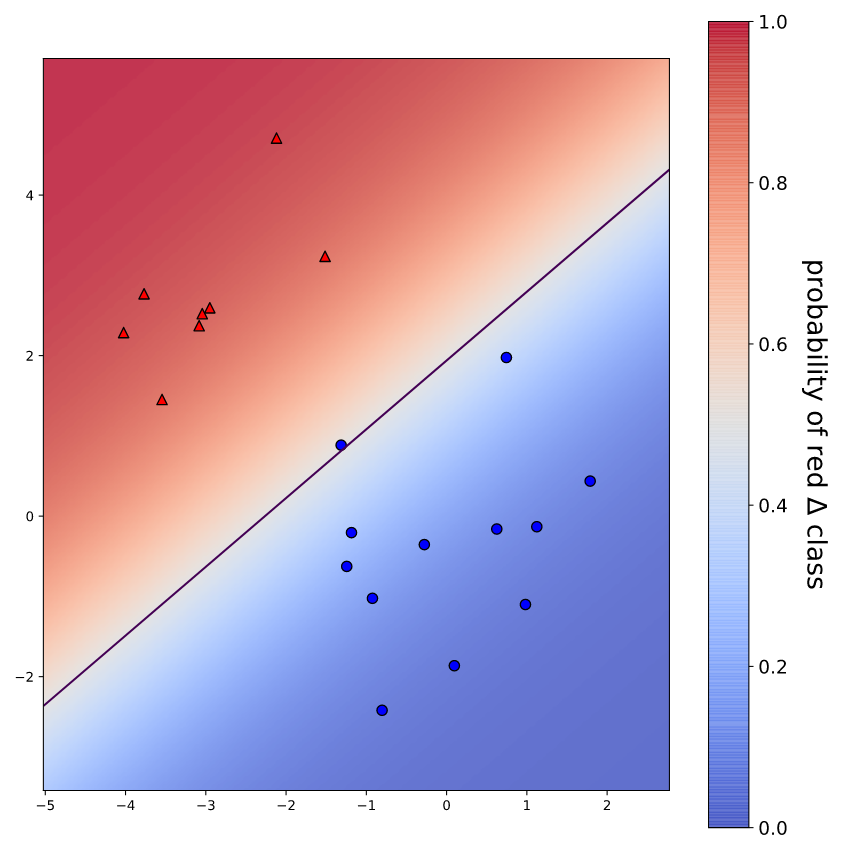

In [ ]:
# Set the regularization strength
model = LogisticRegression(C=0.1)

# Fit and plot
model.fit(X,y)
plot_classifier(X,y,model,proba=True)

# Predict probabilities on training points
prob = model.predict_proba(X)
print("Maximum predicted probability", np.max(prob))

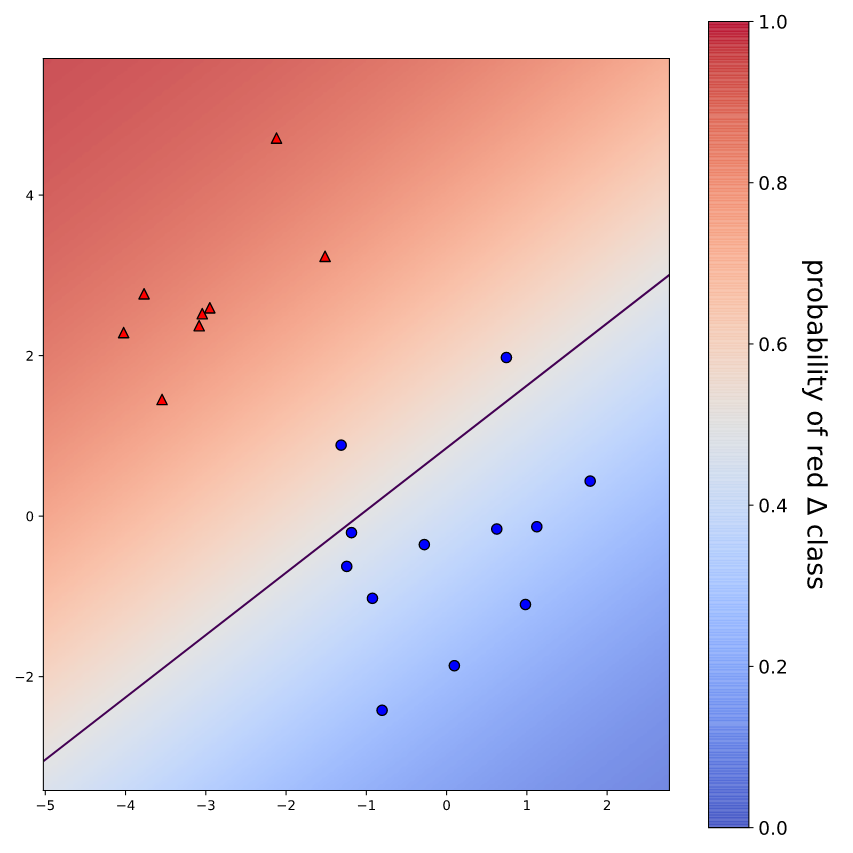

smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function.

In [ ]:
## Visualizing easy and difficult examples

lr = LogisticRegression()
lr.fit(X,y)

# Get predicted probabilities
proba = lr.predict_proba(X)

# Sort the example indices by their maximum probability
proba_inds = np.argsort(np.max(proba,axis=1))

# Show the most confident (least ambiguous) digit
show_digit(proba_inds[-1], lr)

# Show the least confident (most ambiguous) digit
show_digit(proba_inds[0], lr)

##### Multi-class Logistic Regression

combining binary classifiers with one vs. rest
- dataset examples with three classes
- create three instances of logistic regression with target equaling each class
- model learns to distinguish class 0 from not 0, class 1 from not 1, and class 2 from not 2
        lr0.fit(X,y==0)
        lr1.fit(X,y==1)
        lr2.fit(X,y==2)
- use decision function to determine which classifier give the largest raw model output
        lr0.decision_function(X)[0]
        lr1.decision_function(X)[0]
        lr2.decision_function(X)[0]
- largest is from classifier 0 so that becomes the class to predict
- fit the model and predict, let scikitlearn do the work, still get class 0
        lr.fit(X,y)
        lr.predict(X)[0] OUTPUT: 0
        
Can also achieve multi-class classification with logistic regression is to modify the loss function so it directly optimizes accuracy on the multiclass problem (also called multinomial, softmax, or cross-entropy loss)
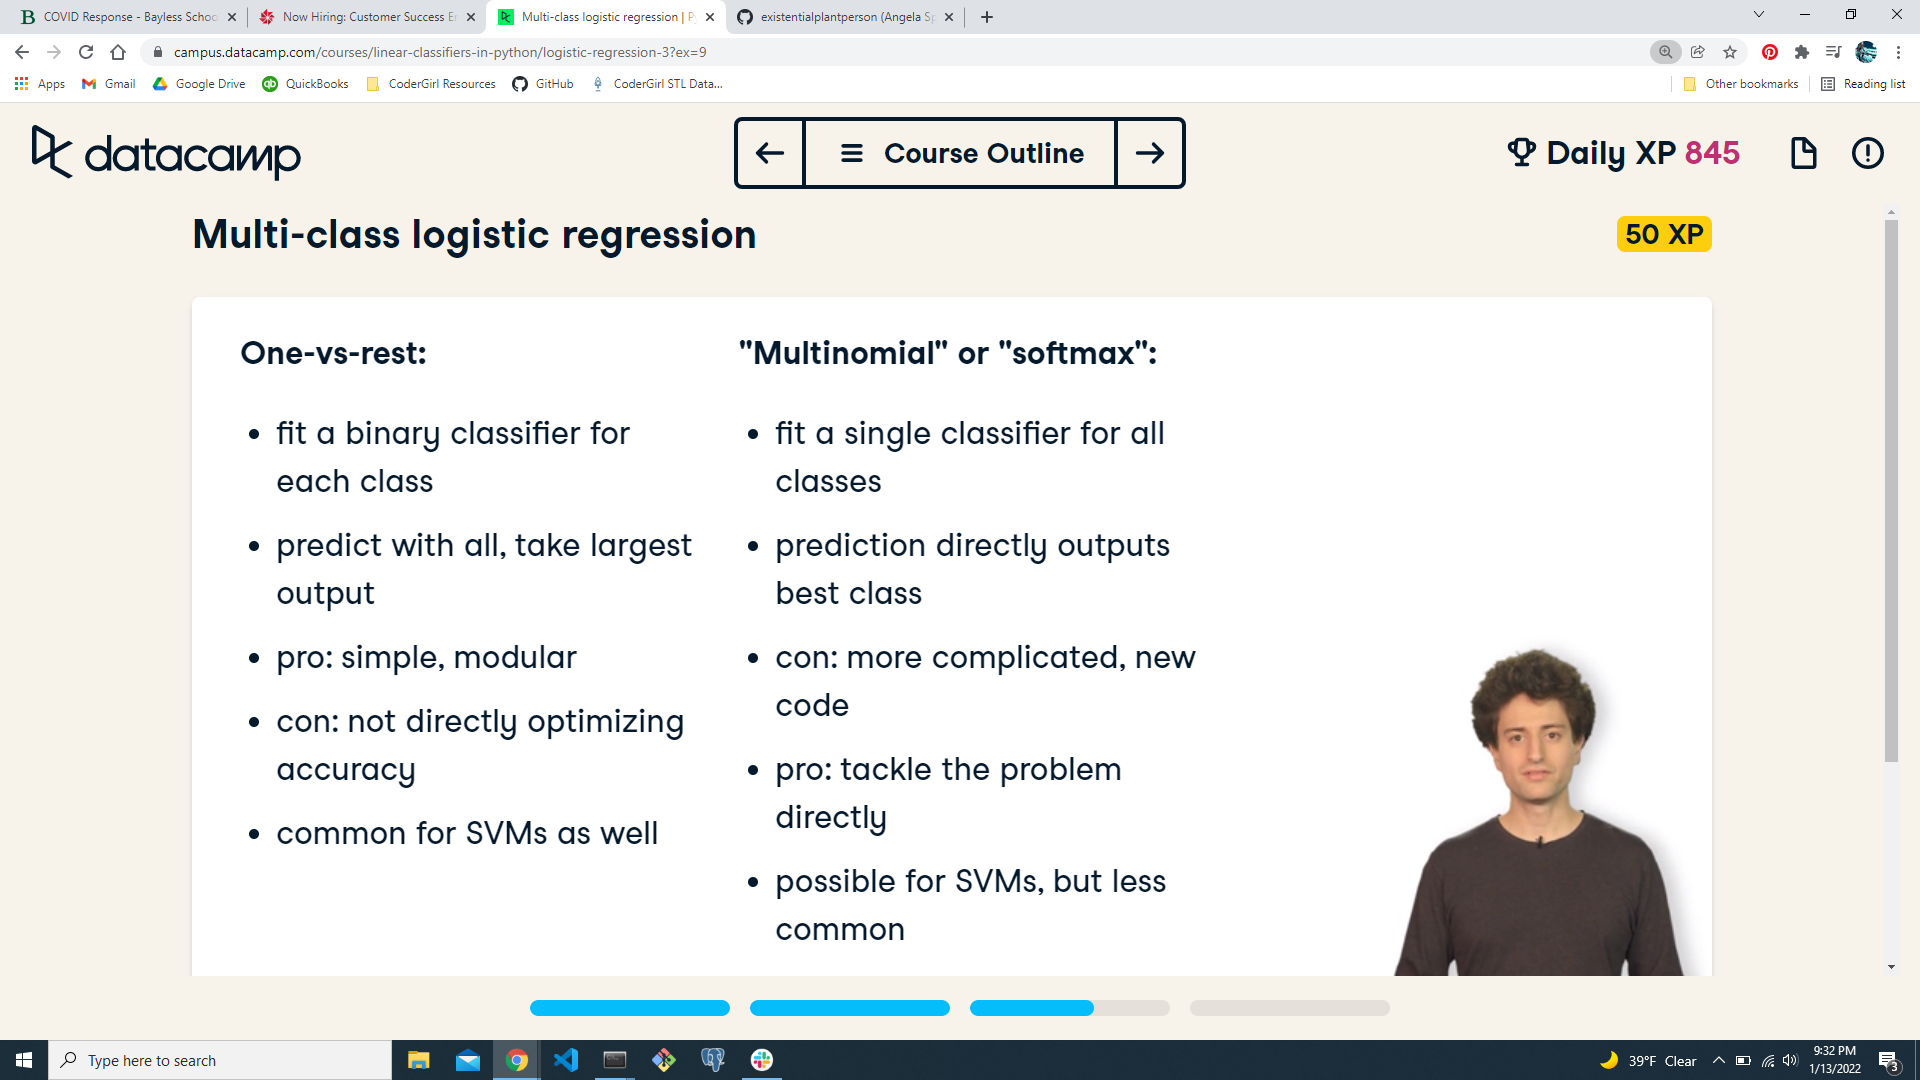

Model coefficients for multi-class
- one vs rest by default
        lr_ovr = LogReg()
        lr_ovr.fit(X,y)
        lr_ovr.coef_.shape
        Output: (3,13) # one coefficient per feature per class + 1 intercept/class
        lr_ovr.intercept_.shape
        Output: (3,) # one intercept per class
        
- instantiate a multinomial version with multi_class argument
- must also change solver parameter (specifies algorithm to minimize lost, default is for binary problem)
        lr_mn = LogReg(multi_class='multinomial', solver='lbfgs')
        lr_mn.fit(X,y)
        lr_mn.coef_.shape 
        Output - same as above
        lr_ms.intercept_.shape
        Output - same as above

In [ ]:
## Fitting multi-class LogReg
# Fit one-vs-rest logistic regression classifier
lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

print("OVR training accuracy:", lr_ovr.score(X_train, y_train))
print("OVR test accuracy    :", lr_ovr.score(X_test, y_test))

# Fit softmax classifier
lr_mn = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_mn.fit(X_train, y_train)

print("Softmax training accuracy:", lr_mn.score(X_train, y_train))
print("Softmax test accuracy    :", lr_mn.score(X_test, y_test))

OUTPUT:
OVR training accuracy: 0.9948032665181886
OVR test accuracy    : 0.9644444444444444
Softmax training accuracy: 1.0
Softmax test accuracy    : 0.9688888888888889

In [ ]:
##Visualizing multi-class LogReg

##lr_ovr never predicts the dark blue class.
##Let's explore why this happens by plotting one of the 
##binary classifiers that it's using behind the scenes.

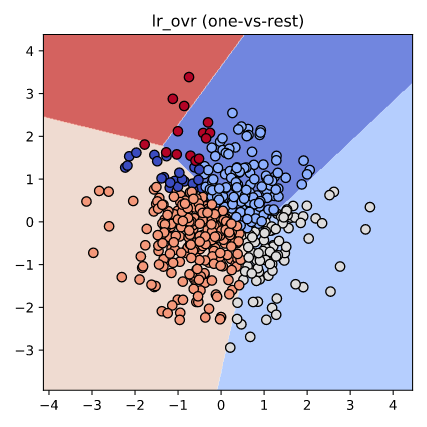

In [ ]:
# Print training accuracies
print("Softmax     training accuracy:", lr_mn.score(X_train, y_train))
print("One-vs-rest training accuracy:", lr_ovr.score(X_train, y_train))

# Create the binary classifier (class 1 vs. rest)
lr_class_1 = LogisticRegression()
lr_class_1.fit(X_train, y_train==1)

# Plot the binary classifier (class 1 vs. rest)
plot_classifier(X_train, y_train==1, lr_class_1)

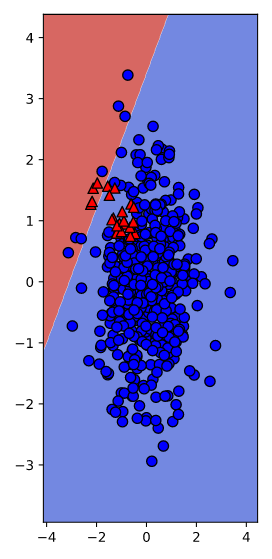

In [ ]:
## This classifier is not effective for this dataset

In [ ]:
## One-vs-rest SVM
## repeat the previous exercise with a non-linear SVM

# We'll use SVC instead of LinearSVC from now on
from sklearn.svm import SVC

# Create/plot the binary classifier (class 1 vs. rest)
svm_class_1 = SVC()
svm_class_1.fit(X_train, y_train==1)
plot_classifier(X_train,y_train==1,svm_class_1)

# The non-linear SVM works fine with one-vs-rest on this dataset 
# because it learns to "surround" class 1.

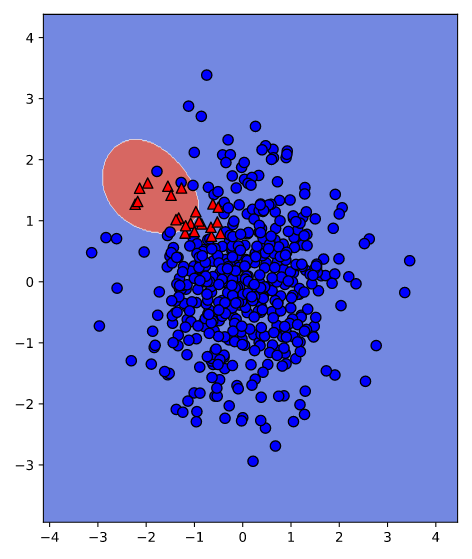

## CHAPTER 4 SUPPORT VECTORS
- Last chapter - logistic regression is a linear classifier learned with a logistic loss function
- SVM - also linear classifier, uses hinge loss funciton and L@ regularization
    - the loss graph looks similar, the flat part of the hinge is the main difference, flattens for values greater than one (correct predicitons neyond margin of error)
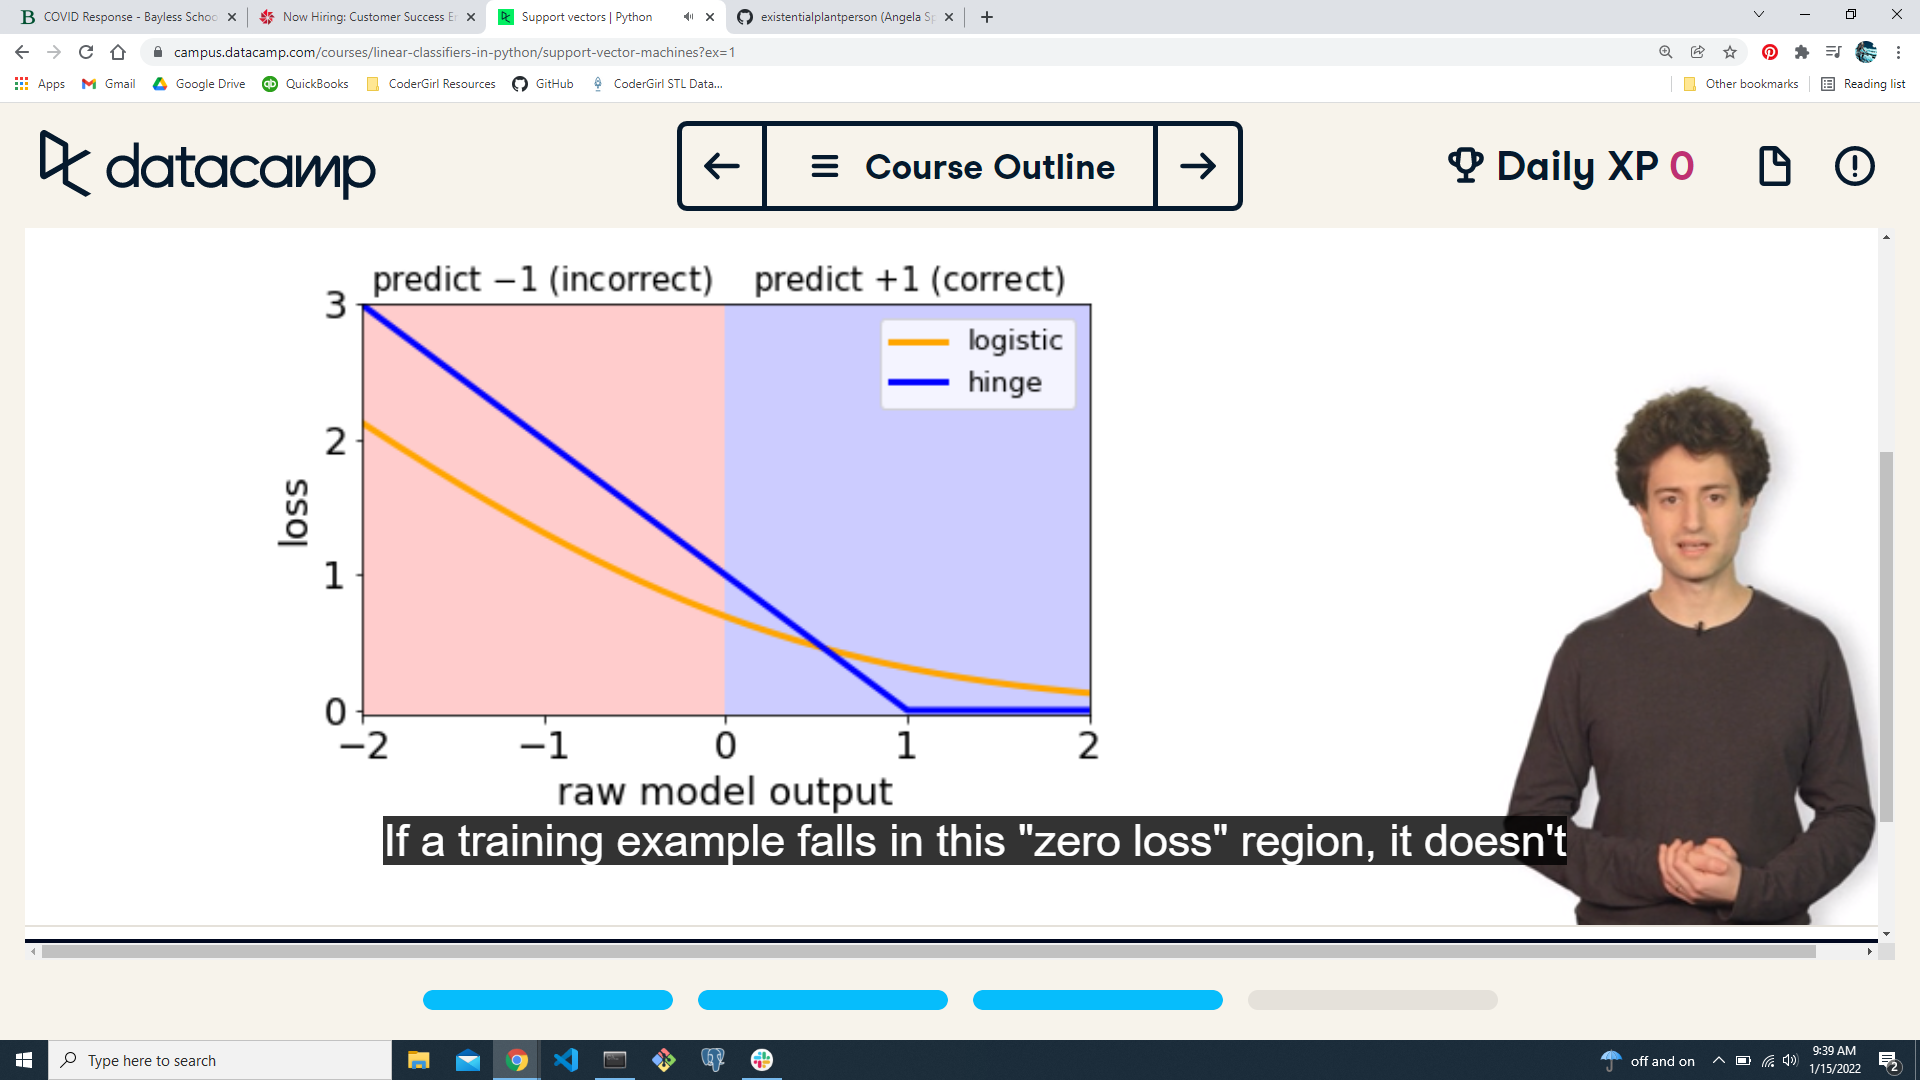
    - Support vectors are defined as training examples that influence the decision boundar
    - support vectors are training examples that are NOT in the flat part of the diagram; an example that is incorrectly classified or close to the boundary
        - "close" is controlled by the regularization strength
    - support vectors have an affect on the model, removing it has no affect beacause its loss was already 0
    - having a small number of support vectors makes kernel SVMs very fast
    - idea of SVMs 'mazimizing the margin' - margin is the distance from the support vector to the decision boundary. the length of that line is the margin; with a not too large regularization strength, SVMs maximize the margin of linearly seperable datasets (however, most datasets are not linearly seperable); can somewhat be extended to non-linear datasets
    - SVMs are mathematically the sme as hinge loss with L2 regularization

In [ ]:
## Effect of removing examples 
## observe this behavior by removing non support vectors from the training set

##The wine quality dataset is already loaded into X and y (first two features only)
##(Note: we specify lims in plot_classifier() so that the two plots are forced to use 
## the same axis limits and can be compared directly.)

# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(X,y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

OUTPUT:
- Number of original examples 178
- Number of support vectors 81
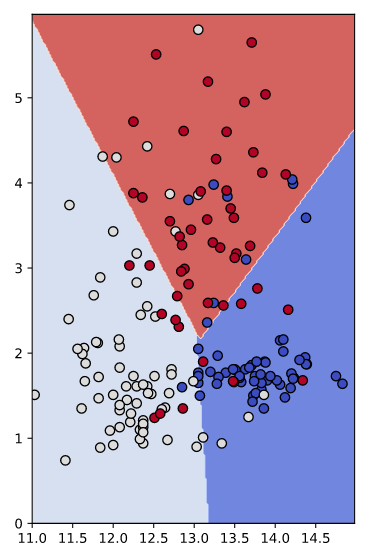 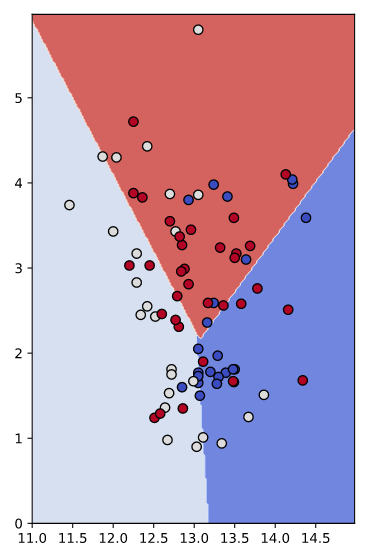

##### Kernel SVMs
- fit non-linear boundaries with linear classifiers
- transforming a feature can help achieve this
    - transformed feature = (original feature) ** 2
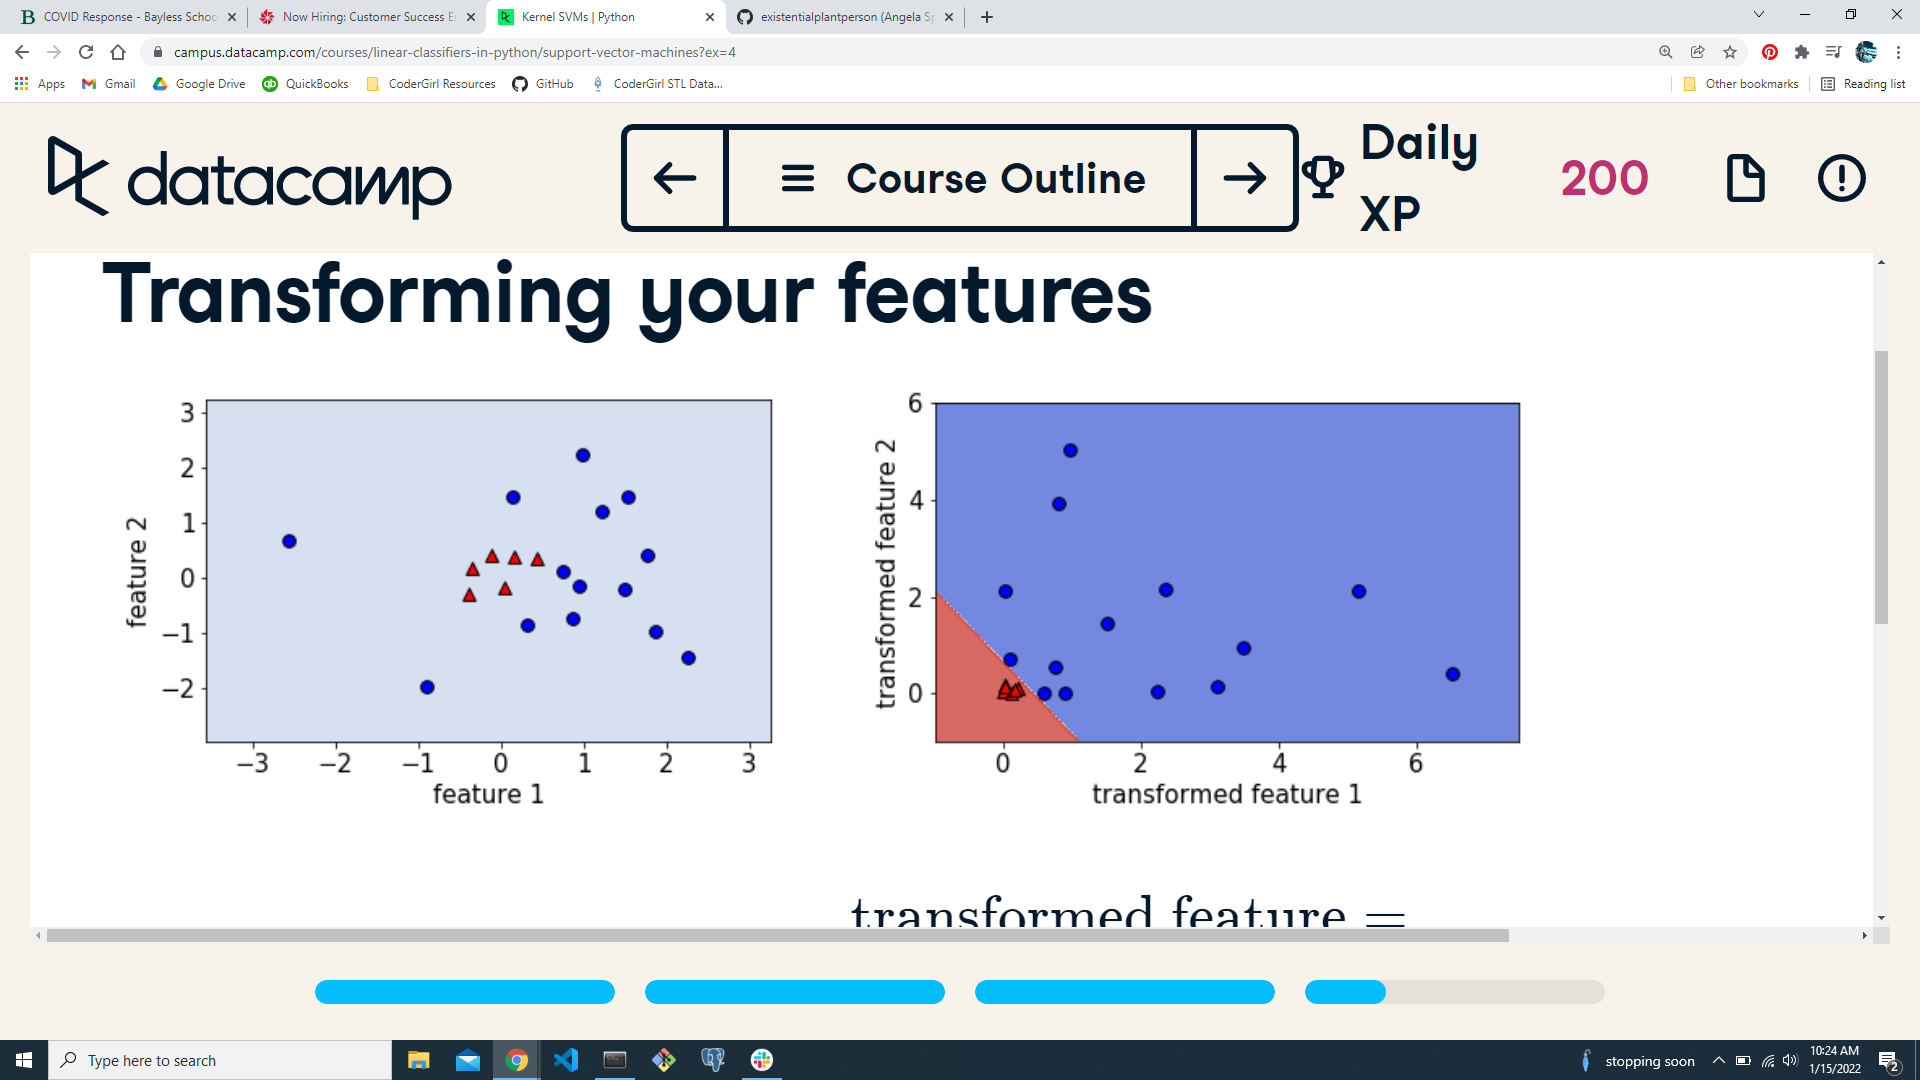

- what does the shape of the boundary do if we unsquare the features?
- we get an ellipse
- fitting a linear model in a transformed space sorrecponds to fitting a linear model in the original space
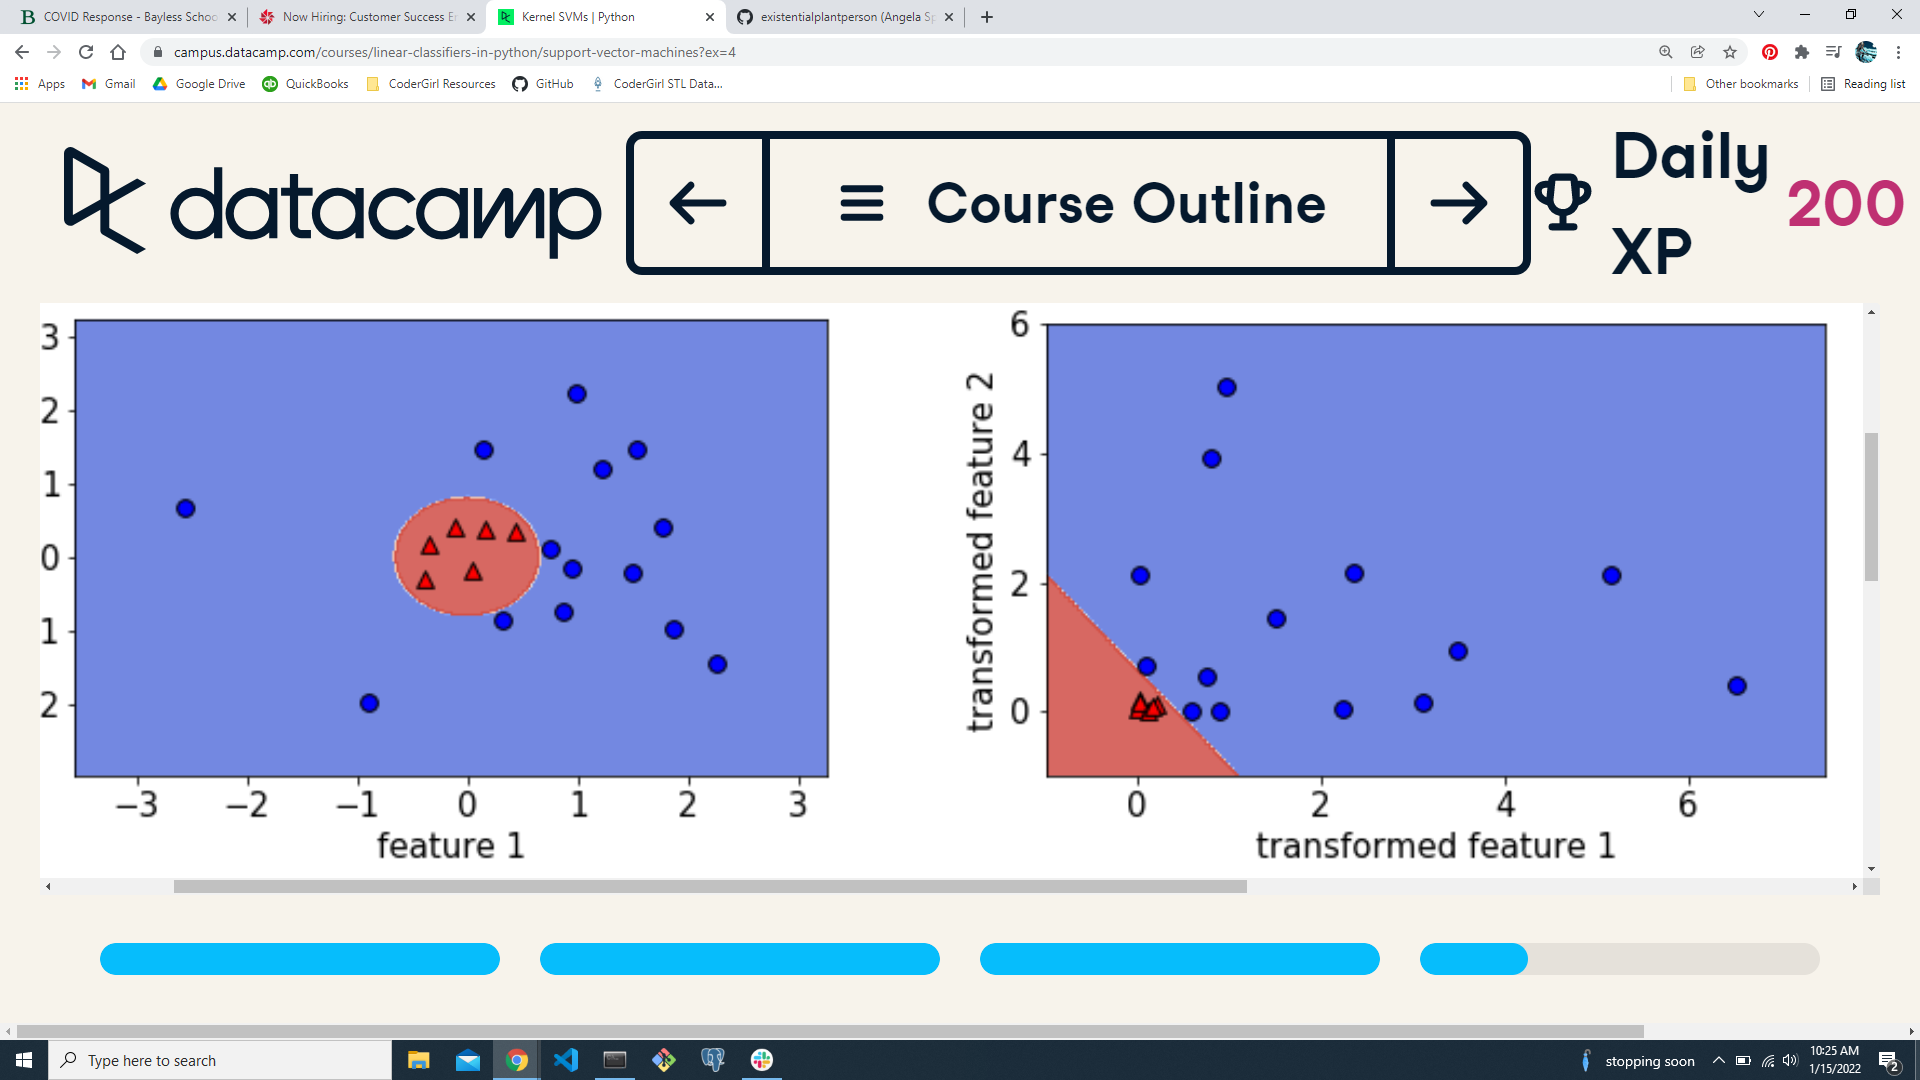

kernels and kernal SVMs impliment feature transformations in an efficient way
    from sklearn.svm import SVC
    svm = SVC(gamma = 1)  # default is kernel = 'rbf'
    fit 
    predict
- parameter exists to control regularization
- gamma parameter smooths the boundary, decreasing makes smoother
    - increasing gamma to 2 in this example give 100% training accuracy and overfits the model to create islands of decision boundaries

In [ ]:
## find the gamma that maximizes cross-validation accuracy using GridSearchCV

# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, param_grid = parameters)
searcher.fit(X,y)

# Report the best parameters
print("Best CV params", searcher.best_params_)

OUTPUT:
    Best CV params {'gamma': 0.001}

In [ ]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, param_grid = parameters)
searcher.fit(X_train,y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test,y_test))

OUTPUT:
Best CV params {'C': 10, 'gamma': 0.0001}
Best CV accuracy 0.9988864142538976
Test accuracy of best grid search hypers: 0.9988876529477196
    
    #Note that the best value of gamma, 0.0001, 
    ## is different from the value of 0.001 that we got in the previous exercise, 
    ## when we fixed C=1.

#### Comparing Logistic Regression and SVM

- both linear classifiers
- both can use kernels (slow with LogReg, fast with SVM)
- both can produce porobability outputs (natural with LogReg, must be coerced from SVM)
- both can be extended to multi-class
- LogReg, all data points affect fit
- SVM, only support vectors affect fit
- LogReg uses L1 and L2 regularization
- SVM conventionally uses just L2 and hinge loss regularization

- Logistic Regression in sklearn
        linear_model.LogisticRegression
        C (inverse regularization strength)
        penalty (type of regularization)
        multi_class (type of multi-class)
        
- SVM in sklearn:
        svm.LinearSVC (linear) and svm.SVC (kernal, but can also set kernal to linear to get some result)
        C (inverse regularization strength)
        kernal (type of kernal)
        gamma (inverse RBF smoothness for kernal SVC)
        
SGDClassifier - another method that scales well to large datasets
- model is the same if certain parameters are selected
- works the same, but does have a different regularization paramerer (alpha)
- alpha = 1/C (iverse of C) so larger alpha means more regularization
        from sklearn.linear_model import SGDClassifier
        logreg = SGDClassifier(loss='log')
        linsvm = SGDClassifier(loss='hinge')

In [ ]:
## Using SGDClassifier
## hyperparameter search over the regularization type, regularization strength, 
## and the loss (logistic regression vs. linear SVM) using SGDClassifier()

# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

OUTPUT:
Best CV params {'alpha': 0.0001, 'loss': 'hinge', 'penalty': 'l1'}
Best CV accuracy 0.94351630867144
Test accuracy of best grid search hypers: 0.9592592592592593

One advantage of SGDClassifier is that it's very fast - this would have taken a lot longer with LogisticRegression or LinearSVC